In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('two_spiral.csv')

In [105]:
data.head()

,x,y,C
0,0.3250,-0.0987,0.9
1,0.1850,0.1070,0.1
2,-0.4310,0.0145,0.9
3,0.1910,-0.3080,0.9
4,0.0186,0.2810,0.9


In [106]:
x_list = []
o_list = []
input_list = []
ver_x = []
ver_y = []
output_list = []
for idx in range(len(data['C'])):
    ver_x.append([data['x'][idx],data['y'][idx]])
    
    if data['C'][idx] == 0.9:
        x_list.append(idx)
        ver_y.append(0.9)
    else:
        o_list.append(idx)
        ver_y.append(0.1)
        

x_set_v = np.array(ver_x)
y_set_v = np.array(ver_y)
x_set1_v = np.reshape(x_set_v, (len(x_set_v), 2))

In [107]:
x_set_v.shape

(152, 2)

In [108]:
x_set_v[1]

array([ 0.185,  0.107])

In [109]:
x_list_x = []
x_list_y = []
x_list_xy = []
o_list_xy = []
o_list_x = []
o_list_y = []

for elem in x_list:
    x_list_x.append(data['x'][elem])
    x_list_y.append(data['y'][elem])
    x_list_xy.append([data['x'][elem],data['y'][elem]])
    
for elem in o_list:
    o_list_x.append(data['x'][elem])
    o_list_y.append(data['y'][elem])
    o_list_xy.append([data['x'][elem],data['y'][elem]])


#plt.plot(x_list_x,x_list_y, 'g+')
#plt.plot(o_list_x,o_list_y, 'bo')

x_set = np.array(input_list)
y_set = np.array(output_list)
x_set1 = np.reshape(x_set, (len(x_set), 2))

# Data Augumention

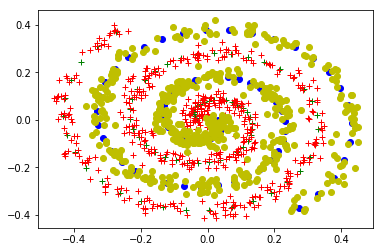

In [239]:
import random

input_list = []
output_list = []

x_list_x_DA = []
x_list_y_DA = []

o_list_x_DA = []
o_list_y_DA = []

mean = 0
std_dev = 0.02

DA_num = 500

for idx in range(DA_num):
    elem = random.choice(x_list)
    dum_x = data['x'][elem]+np.random.normal(loc = mean,scale = std_dev)
    dum_y = data['y'][elem]+np.random.normal(loc = mean,scale = std_dev)
    
    x_list_x_DA.append(dum_x)
    x_list_y_DA.append(dum_y)
    
    input_list.append([dum_x,dum_y])
    output_list.append([0,1])

for idx in range(DA_num):
    elem = random.choice(o_list)
    dum_x = data['x'][elem]+np.random.normal(loc = mean,scale = std_dev)
    dum_y = data['y'][elem]+np.random.normal(loc = mean,scale = std_dev)
    o_list_x_DA.append(dum_x)
    o_list_y_DA.append(dum_y)
    input_list.append([dum_x,dum_y])
    output_list.append([1,0])

plt.plot(x_list_x,x_list_y, 'g+')
plt.plot(x_list_x_DA,x_list_y_DA, 'r+')
plt.plot(o_list_x,o_list_y, 'bo')
plt.plot(o_list_x_DA,o_list_y_DA, 'yo')


x_set = np.array(input_list)
y_set = np.array(output_list)
x_set1 = np.reshape(x_set, (len(x_set), 2))

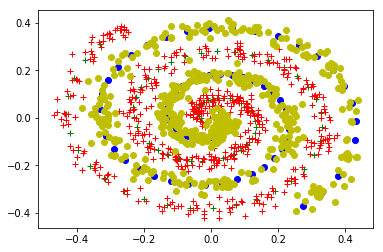

In [265]:
import random

input_list = []
output_list = []

x_list_x_DA = []
x_list_y_DA = []

o_list_x_DA = []
o_list_y_DA = []

mean = 0
std_dev = 0.02

DA_num = 500

for idx in range(DA_num):
    elem = random.choice(x_list)
    dum_x = data['x'][elem]+np.random.normal(loc = mean,scale = std_dev)
    dum_y = data['y'][elem]+np.random.normal(loc = mean,scale = std_dev)
    
    x_list_x_DA.append(dum_x)
    x_list_y_DA.append(dum_y)
    
    input_list.append([dum_x,dum_y])
    output_list.append(0.1)

for idx in range(DA_num):
    elem = random.choice(o_list)
    dum_x = data['x'][elem]+np.random.normal(loc = mean,scale = std_dev)
    dum_y = data['y'][elem]+np.random.normal(loc = mean,scale = std_dev)
    o_list_x_DA.append(dum_x)
    o_list_y_DA.append(dum_y)
    input_list.append([dum_x,dum_y])
    output_list.append(0.9)

plt.plot(x_list_x,x_list_y, 'g+')
plt.plot(x_list_x_DA,x_list_y_DA, 'r+')
plt.plot(o_list_x,o_list_y, 'bo')
plt.plot(o_list_x_DA,o_list_y_DA, 'yo')


x_set = np.array(input_list)
y_set = np.array(output_list)
x_set1 = np.reshape(x_set, (len(x_set), 2))

## Handmade MLP

In [230]:
import math
import numpy as np

def tanh(x):
    return (1-math.exp(-2*x))/(1+math.exp(-2*x))

x = 0.8

d = 0.72
u = 0.01 # Learning Rate

W1_list = []
W2_list = []

z_list = []
y_list = []

delta1_list = []
delta2_list = []

dW2_list = []
dW1_list = []

h1 = 20 
h2 = 10

W1 = np.random.random((2,h1))
W2 = np.random.random((h1,h2))
W3 = np.random.random((h2,1))

In [30]:
a = np.dot(W1.T,x_set_v[1])

In [35]:
a_list = []
for elem in a:
    a_list.append(tanh(elem))
aa = np.array(a_list)
print(aa)

[ 0.1808269   0.11272063  0.12778774  0.02342135  0.04151754  0.14747956
  0.1647191   0.03352036  0.06093745  0.08644294  0.20272931  0.16571879
  0.14730468  0.09822217  0.09325     0.14563375  0.19698854  0.24740052
  0.11065544  0.12250779]


In [209]:
W3

array([[ 0.56104561],
       [ 0.20527323],
       [ 0.38436099],
       [ 0.33058764],
       [ 0.8996236 ],
       [ 0.6840198 ],
       [ 0.4479104 ],
       [ 0.89194425],
       [ 0.61504638],
       [ 0.1776029 ]])

In [41]:
np.dot(b,W3)

array([ 6.80838214])

## Loss Function

In [222]:
def loss(p,y):
    return (p-y)*(p-y)/2

In [179]:
2**3

8

In [243]:
error_list = []
def train(x_l, W1, W2, W3, y):
    """
    Feedforward Part
    
    W1 : Weights between Input Layer and Hidden Layer 1
    W2 : Weights between Hidden Layer 1 and Hidden Layer 2
    W3 : Weights between Hidden Layer 2 and Hidden Layer 3
    """
    
    x = np.reshape(x_l,(2,1))
    #print("x",x.shape)
    
    a = np.dot(W1.T,x)
    a_list = []
    da_list = []
    
    for elem in a:
        dum = tanh(elem)
        a_list.append(dum)
        da_list.append(1-dum**2)
    aaa = np.array(a_list)
    aa = np.reshape(aaa,(20,1))
    daa = np.array(da_list)
    da = np.reshape(daa,(20,1))
    
    #print("aa.shape:",aa.shape)
    
    b = np.dot(W2.T,aa)
    #print("b.shape",b.shape)
    b_list = []
    db_list = []
    for elem1 in b:
        dum1 = tanh(elem1)
        b_list.append(dum1)
        db_list.append(1-dum1**2)
    aba = np.array(b_list)
    ab = np.reshape(aba,(10,1))
    dba = np.array(db_list)
    db = np.reshape(dba,(10,1))
    #print("ab:",ab)
    
    c = np.dot(b.T,W3)
    p = tanh(c)
    
    error = loss(y,p)
    print(error)
    error_list.append(error)

    """
    BackPropergation Part
    """
    derr = 1-p**2
    delta3 = -(y-p)*derr
    delta2 = (db*W3*delta3).T
    dW3 = (ab*delta3)
    #print("delta2",delta2.shape)
    #print("dW3",dW3.shape)
    delta1 = np.dot(W2,delta2.T)*da
    dW2 = np.dot(aa,delta2)
    #print("delta1",delta1.shape)
    #print("dW2",dW2.shape)
    delta0 = np.dot(W1,delta1)
    dW1 = np.dot(x,delta1.T)
    #print("delta0",delta0.shape)
    #print("dW1",dW1.shape)


    W3 = W3 - u*dW3
    W2 = W2 - u*dW2
    W1 = W1 - u*dW1
    
idx_list = []
for idx in range(len(x_set1)):
    idx_list.append(idx)

loop = 100
for dum_idx in range(loop):
    random.shuffle(idx_list)
    for index in idx_list: 
        train(x_set1[index], W1, W2, W3, y_set[index])

[ 0.49999556  1.99999112]


ValueError: shapes (20,1) and (2,10) not aligned: 1 (dim 1) != 2 (dim 0)

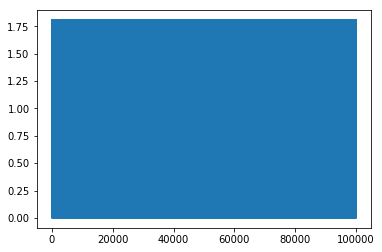

In [236]:
plt.plot(error_list)

In [264]:
x_set1.shape

(1, 2)

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras import optimizers

In [274]:
MLP = Sequential()

h_neuron_nb1 = 20

MLP.add(Dense(h_neuron_nb1,input_shape=(2,)))
MLP.add(Activation('relu'))

MLP.add(Dense(10))
MLP.add(Activation('relu'))

MLP.add(Dense(1))
MLP.add(Activation('relu'))

#MLP.add(Dense(1))
#MLP.add(Activation('relu'))

#MLP.compile('sgd', 'categorical_crossentropy', ['mse'])
#MLP.compile('sgd', 'mean_squared_error', ['mse'])
#autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

sgd = optimizers.SGD(lr=0.05, decay= 0.0, momentum= 0.0, nesterov = False)
MLP.compile(loss='mean_squared_error', optimizer=sgd)

history = MLP.fit(x_set1, y_set, batch_size= 50, nb_epoch= 10000, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10000
800/800 [==============================] - 0s - loss: 0.1822 - val_loss: 0.2728
Epoch 2/10000
800/800 [==============================] - 0s - loss: 0.1495 - val_loss: 0.2493
Epoch 3/10000
800/800 [==============================] - 0s - loss: 0.1489 - val_loss: 0.2437
Epoch 4/10000
800/800 [==============================] - 0s - loss: 0.1485 - val_loss: 0.2504
Epoch 5/10000
800/800 [==============================] - 0s - loss: 0.1485 - val_loss: 0.2229
Epoch 6/10000
800/800 [==============================] - 0s - loss: 0.1481 - val_loss: 0.2359
Epoch 7/10000
800/800 [==============================] - 0s - loss: 0.1479 - val_loss: 0.2605
Epoch 8/10000
800/800 [==============================] - 0s - loss: 0.1477 - val_loss: 0.2240
Epoch 9/10000
800/800 [==============================] - 0s - loss: 0.1479 - val_loss: 0.2385
Epoch 10/10000
800/800 [==============================] - 0s - loss: 0.1473 - val_loss: 0.2184
Epoch 11/1000

800/800 [==============================] - 0s - loss: 0.1437 - val_loss: 0.2079
Epoch 87/10000
800/800 [==============================] - 0s - loss: 0.1447 - val_loss: 0.2071
Epoch 88/10000
800/800 [==============================] - 0s - loss: 0.1439 - val_loss: 0.2518
Epoch 89/10000
800/800 [==============================] - 0s - loss: 0.1438 - val_loss: 0.2623
Epoch 90/10000
800/800 [==============================] - 0s - loss: 0.1439 - val_loss: 0.2361
Epoch 91/10000
800/800 [==============================] - 0s - loss: 0.1439 - val_loss: 0.2243
Epoch 92/10000
800/800 [==============================] - 0s - loss: 0.1436 - val_loss: 0.2315
Epoch 93/10000
800/800 [==============================] - 0s - loss: 0.1437 - val_loss: 0.2430
Epoch 94/10000
800/800 [==============================] - 0s - loss: 0.1438 - val_loss: 0.2615
Epoch 95/10000
800/800 [==============================] - 0s - loss: 0.1440 - val_loss: 0.1987
Epoch 96/10000
800/800 [==============================] - 0s - lo

800/800 [==============================] - 0s - loss: 0.1423 - val_loss: 0.2555
Epoch 172/10000
800/800 [==============================] - 0s - loss: 0.1417 - val_loss: 0.2355
Epoch 173/10000
800/800 [==============================] - 0s - loss: 0.1423 - val_loss: 0.2296
Epoch 174/10000
800/800 [==============================] - 0s - loss: 0.1419 - val_loss: 0.2227
Epoch 175/10000
800/800 [==============================] - 0s - loss: 0.1418 - val_loss: 0.2331
Epoch 176/10000
800/800 [==============================] - 0s - loss: 0.1416 - val_loss: 0.2534
Epoch 177/10000
800/800 [==============================] - 0s - loss: 0.1414 - val_loss: 0.1783
Epoch 178/10000
800/800 [==============================] - 0s - loss: 0.1425 - val_loss: 0.2011
Epoch 179/10000
800/800 [==============================] - 0s - loss: 0.1422 - val_loss: 0.2152
Epoch 180/10000
800/800 [==============================] - 0s - loss: 0.1419 - val_loss: 0.2135
Epoch 181/10000
800/800 [==============================]

800/800 [==============================] - 0s - loss: 0.1398 - val_loss: 0.2195
Epoch 257/10000
800/800 [==============================] - 0s - loss: 0.1398 - val_loss: 0.1895
Epoch 258/10000
800/800 [==============================] - 0s - loss: 0.1392 - val_loss: 0.2420
Epoch 259/10000
800/800 [==============================] - 0s - loss: 0.1394 - val_loss: 0.2412
Epoch 260/10000
800/800 [==============================] - 0s - loss: 0.1400 - val_loss: 0.2281
Epoch 261/10000
800/800 [==============================] - 0s - loss: 0.1396 - val_loss: 0.2102
Epoch 262/10000
800/800 [==============================] - 0s - loss: 0.1400 - val_loss: 0.2090
Epoch 263/10000
800/800 [==============================] - 0s - loss: 0.1388 - val_loss: 0.2543
Epoch 264/10000
800/800 [==============================] - 0s - loss: 0.1389 - val_loss: 0.2578
Epoch 265/10000
800/800 [==============================] - 0s - loss: 0.1395 - val_loss: 0.2452
Epoch 266/10000
800/800 [==============================]

800/800 [==============================] - 0s - loss: 0.1375 - val_loss: 0.2040
Epoch 342/10000
800/800 [==============================] - 0s - loss: 0.1376 - val_loss: 0.2194
Epoch 343/10000
800/800 [==============================] - 0s - loss: 0.1378 - val_loss: 0.2011
Epoch 344/10000
800/800 [==============================] - 0s - loss: 0.1376 - val_loss: 0.2144
Epoch 345/10000
800/800 [==============================] - 0s - loss: 0.1373 - val_loss: 0.1620
Epoch 346/10000
800/800 [==============================] - 0s - loss: 0.1378 - val_loss: 0.2280
Epoch 347/10000
800/800 [==============================] - 0s - loss: 0.1367 - val_loss: 0.2322
Epoch 348/10000
800/800 [==============================] - 0s - loss: 0.1374 - val_loss: 0.2415
Epoch 349/10000
800/800 [==============================] - 0s - loss: 0.1381 - val_loss: 0.2290
Epoch 350/10000
800/800 [==============================] - 0s - loss: 0.1378 - val_loss: 0.2249
Epoch 351/10000
800/800 [==============================]

800/800 [==============================] - 0s - loss: 0.1360 - val_loss: 0.2045
Epoch 426/10000
800/800 [==============================] - 0s - loss: 0.1360 - val_loss: 0.2179
Epoch 427/10000
800/800 [==============================] - 0s - loss: 0.1356 - val_loss: 0.2014
Epoch 428/10000
800/800 [==============================] - 0s - loss: 0.1349 - val_loss: 0.2644ss: 0.13
Epoch 429/10000
800/800 [==============================] - 0s - loss: 0.1354 - val_loss: 0.1696
Epoch 430/10000
800/800 [==============================] - 0s - loss: 0.1368 - val_loss: 0.2302
Epoch 431/10000
800/800 [==============================] - 0s - loss: 0.1351 - val_loss: 0.1537
Epoch 432/10000
800/800 [==============================] - 0s - loss: 0.1362 - val_loss: 0.2476
Epoch 433/10000
800/800 [==============================] - 0s - loss: 0.1355 - val_loss: 0.2268
Epoch 434/10000
800/800 [==============================] - 0s - loss: 0.1350 - val_loss: 0.1917
Epoch 435/10000
800/800 [=======================

800/800 [==============================] - 0s - loss: 0.1358 - val_loss: 0.2374
Epoch 511/10000
800/800 [==============================] - 0s - loss: 0.1341 - val_loss: 0.2417
Epoch 512/10000
800/800 [==============================] - 0s - loss: 0.1350 - val_loss: 0.2062
Epoch 513/10000
800/800 [==============================] - 0s - loss: 0.1337 - val_loss: 0.2101
Epoch 514/10000
800/800 [==============================] - 0s - loss: 0.1354 - val_loss: 0.2463
Epoch 515/10000
800/800 [==============================] - 0s - loss: 0.1356 - val_loss: 0.2315
Epoch 516/10000
800/800 [==============================] - 0s - loss: 0.1353 - val_loss: 0.2319
Epoch 517/10000
800/800 [==============================] - 0s - loss: 0.1327 - val_loss: 0.1980
Epoch 518/10000
800/800 [==============================] - 0s - loss: 0.1358 - val_loss: 0.2009
Epoch 519/10000
800/800 [==============================] - 0s - loss: 0.1342 - val_loss: 0.2689
Epoch 520/10000
800/800 [==============================]

800/800 [==============================] - 0s - loss: 0.1352 - val_loss: 0.2144
Epoch 595/10000
800/800 [==============================] - 0s - loss: 0.1346 - val_loss: 0.2219
Epoch 596/10000
800/800 [==============================] - 0s - loss: 0.1361 - val_loss: 0.1754
Epoch 597/10000
800/800 [==============================] - 0s - loss: 0.1338 - val_loss: 0.2844
Epoch 598/10000
800/800 [==============================] - 0s - loss: 0.1339 - val_loss: 0.2357
Epoch 599/10000
800/800 [==============================] - 0s - loss: 0.1334 - val_loss: 0.2398
Epoch 600/10000
800/800 [==============================] - 0s - loss: 0.1335 - val_loss: 0.1476
Epoch 601/10000
800/800 [==============================] - 0s - loss: 0.1353 - val_loss: 0.2650
Epoch 602/10000
800/800 [==============================] - 0s - loss: 0.1339 - val_loss: 0.1735
Epoch 603/10000
800/800 [==============================] - 0s - loss: 0.1339 - val_loss: 0.2051
Epoch 604/10000
800/800 [==============================]

800/800 [==============================] - 0s - loss: 0.1345 - val_loss: 0.2408
Epoch 679/10000
800/800 [==============================] - 0s - loss: 0.1327 - val_loss: 0.2484
Epoch 680/10000
800/800 [==============================] - 0s - loss: 0.1321 - val_loss: 0.2182
Epoch 681/10000
800/800 [==============================] - 0s - loss: 0.1334 - val_loss: 0.2017
Epoch 682/10000
800/800 [==============================] - 0s - loss: 0.1346 - val_loss: 0.1875
Epoch 683/10000
800/800 [==============================] - 0s - loss: 0.1350 - val_loss: 0.2692
Epoch 684/10000
800/800 [==============================] - 0s - loss: 0.1317 - val_loss: 0.2243
Epoch 685/10000
800/800 [==============================] - 0s - loss: 0.1325 - val_loss: 0.2677
Epoch 686/10000
800/800 [==============================] - 0s - loss: 0.1337 - val_loss: 0.1537
Epoch 687/10000
800/800 [==============================] - 0s - loss: 0.1344 - val_loss: 0.2002
Epoch 688/10000
800/800 [==============================]

800/800 [==============================] - 0s - loss: 0.1329 - val_loss: 0.2475
Epoch 764/10000
800/800 [==============================] - 0s - loss: 0.1329 - val_loss: 0.1724ss: 0.131
Epoch 765/10000
800/800 [==============================] - 0s - loss: 0.1316 - val_loss: 0.2330
Epoch 766/10000
800/800 [==============================] - 0s - loss: 0.1309 - val_loss: 0.1736
Epoch 767/10000
800/800 [==============================] - ETA: 0s - loss: 0.133 - 0s - loss: 0.1327 - val_loss: 0.1796
Epoch 768/10000
800/800 [==============================] - 0s - loss: 0.1314 - val_loss: 0.1841
Epoch 769/10000
800/800 [==============================] - 0s - loss: 0.1355 - val_loss: 0.2645
Epoch 770/10000
800/800 [==============================] - 0s - loss: 0.1324 - val_loss: 0.2548
Epoch 771/10000
800/800 [==============================] - 0s - loss: 0.1316 - val_loss: 0.2762
Epoch 772/10000
800/800 [==============================] - 0s - loss: 0.1323 - val_loss: 0.1796
Epoch 773/10000
800/800

800/800 [==============================] - 0s - loss: 0.1322 - val_loss: 0.1702
Epoch 848/10000
800/800 [==============================] - 0s - loss: 0.1322 - val_loss: 0.2249
Epoch 849/10000
800/800 [==============================] - ETA: 0s - loss: 0.135 - 0s - loss: 0.1329 - val_loss: 0.3137
Epoch 850/10000
800/800 [==============================] - 0s - loss: 0.1309 - val_loss: 0.2253
Epoch 851/10000
800/800 [==============================] - 0s - loss: 0.1312 - val_loss: 0.2846
Epoch 852/10000
800/800 [==============================] - 0s - loss: 0.1329 - val_loss: 0.2702
Epoch 853/10000
800/800 [==============================] - 0s - loss: 0.1346 - val_loss: 0.2063
Epoch 854/10000
800/800 [==============================] - 0s - loss: 0.1299 - val_loss: 0.2093
Epoch 855/10000
800/800 [==============================] - 0s - loss: 0.1339 - val_loss: 0.2158
Epoch 856/10000
800/800 [==============================] - 0s - loss: 0.1352 - val_loss: 0.1222
Epoch 857/10000
800/800 [=======

800/800 [==============================] - 0s - loss: 0.1315 - val_loss: 0.1965
Epoch 932/10000
800/800 [==============================] - 0s - loss: 0.1324 - val_loss: 0.2069
Epoch 933/10000
800/800 [==============================] - 0s - loss: 0.1290 - val_loss: 0.2700
Epoch 934/10000
800/800 [==============================] - 0s - loss: 0.1320 - val_loss: 0.1944
Epoch 935/10000
800/800 [==============================] - 0s - loss: 0.1373 - val_loss: 0.2176
Epoch 936/10000
800/800 [==============================] - 0s - loss: 0.1289 - val_loss: 0.1891
Epoch 937/10000
800/800 [==============================] - 0s - loss: 0.1321 - val_loss: 0.1864
Epoch 938/10000
800/800 [==============================] - 0s - loss: 0.1310 - val_loss: 0.1166
Epoch 939/10000
800/800 [==============================] - 0s - loss: 0.1299 - val_loss: 0.1953
Epoch 940/10000
800/800 [==============================] - 0s - loss: 0.1286 - val_loss: 0.1246
Epoch 941/10000
800/800 [==============================]

Epoch 1016/10000
800/800 [==============================] - 0s - loss: 0.1296 - val_loss: 0.1541
Epoch 1017/10000
800/800 [==============================] - 0s - loss: 0.1305 - val_loss: 0.2159
Epoch 1018/10000
800/800 [==============================] - 0s - loss: 0.1302 - val_loss: 0.2027
Epoch 1019/10000
800/800 [==============================] - 0s - loss: 0.1288 - val_loss: 0.1246
Epoch 1020/10000
800/800 [==============================] - 0s - loss: 0.1320 - val_loss: 0.1261
Epoch 1021/10000
800/800 [==============================] - 0s - loss: 0.1305 - val_loss: 0.2006
Epoch 1022/10000
800/800 [==============================] - 0s - loss: 0.1286 - val_loss: 0.2988
Epoch 1023/10000
800/800 [==============================] - 0s - loss: 0.1322 - val_loss: 0.1764
Epoch 1024/10000
800/800 [==============================] - 0s - loss: 0.1293 - val_loss: 0.1519
Epoch 1025/10000
800/800 [==============================] - 0s - loss: 0.1318 - val_loss: 0.2306
Epoch 1026/10000
800/800 [====

800/800 [==============================] - 0s - loss: 0.1291 - val_loss: 0.1609
Epoch 1101/10000
800/800 [==============================] - 0s - loss: 0.1255 - val_loss: 0.2464
Epoch 1102/10000
800/800 [==============================] - 0s - loss: 0.1262 - val_loss: 0.1897
Epoch 1103/10000
800/800 [==============================] - 0s - loss: 0.1326 - val_loss: 0.2141
Epoch 1104/10000
800/800 [==============================] - 0s - loss: 0.1371 - val_loss: 0.1086
Epoch 1105/10000
800/800 [==============================] - 0s - loss: 0.1284 - val_loss: 0.1995
Epoch 1106/10000
800/800 [==============================] - 0s - loss: 0.1268 - val_loss: 0.1969
Epoch 1107/10000
800/800 [==============================] - 0s - loss: 0.1344 - val_loss: 0.2152
Epoch 1108/10000
800/800 [==============================] - 0s - loss: 0.1301 - val_loss: 0.2428
Epoch 1109/10000
800/800 [==============================] - 0s - loss: 0.1340 - val_loss: 0.2969ss: 0.134
Epoch 1110/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.1304 - val_loss: 0.2098
Epoch 1185/10000
800/800 [==============================] - 0s - loss: 0.1294 - val_loss: 0.2866
Epoch 1186/10000
800/800 [==============================] - 0s - loss: 0.1275 - val_loss: 0.2094
Epoch 1187/10000
800/800 [==============================] - 0s - loss: 0.1316 - val_loss: 0.2206
Epoch 1188/10000
800/800 [==============================] - 0s - loss: 0.1264 - val_loss: 0.2370
Epoch 1189/10000
800/800 [==============================] - 0s - loss: 0.1271 - val_loss: 0.2609
Epoch 1190/10000
800/800 [==============================] - 0s - loss: 0.1264 - val_loss: 0.1675
Epoch 1191/10000
800/800 [==============================] - 0s - loss: 0.1367 - val_loss: 0.1181
Epoch 1192/10000
800/800 [==============================] - 0s - loss: 0.1266 - val_loss: 0.2328ss: 0.12
Epoch 1193/10000
800/800 [==============================] - 0s - loss: 0.1241 - val_loss: 0.2747
Epoch 1194/10000
800/800 [=============

800/800 [==============================] - ETA: 0s - loss: 0.127 - 0s - loss: 0.1268 - val_loss: 0.1860
Epoch 1268/10000
800/800 [==============================] - 0s - loss: 0.1290 - val_loss: 0.2280
Epoch 1269/10000
800/800 [==============================] - 0s - loss: 0.1246 - val_loss: 0.1415
Epoch 1270/10000
800/800 [==============================] - 0s - loss: 0.1297 - val_loss: 0.1080
Epoch 1271/10000
800/800 [==============================] - 0s - loss: 0.1263 - val_loss: 0.1534
Epoch 1272/10000
800/800 [==============================] - 0s - loss: 0.1250 - val_loss: 0.1060
Epoch 1273/10000
800/800 [==============================] - 0s - loss: 0.1316 - val_loss: 0.1723
Epoch 1274/10000
800/800 [==============================] - 0s - loss: 0.1278 - val_loss: 0.1730
Epoch 1275/10000
800/800 [==============================] - 0s - loss: 0.1317 - val_loss: 0.2679
Epoch 1276/10000
800/800 [==============================] - 0s - loss: 0.1248 - val_loss: 0.2183
Epoch 1277/10000
800/80

800/800 [==============================] - 0s - loss: 0.1238 - val_loss: 0.1911
Epoch 1351/10000
800/800 [==============================] - 0s - loss: 0.1242 - val_loss: 0.1895
Epoch 1352/10000
800/800 [==============================] - 0s - loss: 0.1290 - val_loss: 0.2541
Epoch 1353/10000
800/800 [==============================] - 0s - loss: 0.1248 - val_loss: 0.2751ss: 0.124
Epoch 1354/10000
800/800 [==============================] - 0s - loss: 0.1238 - val_loss: 0.2071
Epoch 1355/10000
800/800 [==============================] - 0s - loss: 0.1275 - val_loss: 0.3182
Epoch 1356/10000
800/800 [==============================] - 0s - loss: 0.1244 - val_loss: 0.2160
Epoch 1357/10000
800/800 [==============================] - 0s - loss: 0.1237 - val_loss: 0.1691
Epoch 1358/10000
800/800 [==============================] - 0s - loss: 0.1272 - val_loss: 0.2801
Epoch 1359/10000
800/800 [==============================] - 0s - loss: 0.1270 - val_loss: 0.1486
Epoch 1360/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.1210 - val_loss: 0.2114
Epoch 1435/10000
800/800 [==============================] - ETA: 0s - loss: 0.127 - 0s - loss: 0.1279 - val_loss: 0.1534
Epoch 1436/10000
800/800 [==============================] - 0s - loss: 0.1280 - val_loss: 0.1219
Epoch 1437/10000
800/800 [==============================] - 0s - loss: 0.1259 - val_loss: 0.1823
Epoch 1438/10000
800/800 [==============================] - 0s - loss: 0.1249 - val_loss: 0.2513
Epoch 1439/10000
800/800 [==============================] - 0s - loss: 0.1302 - val_loss: 0.2547
Epoch 1440/10000
800/800 [==============================] - 0s - loss: 0.1290 - val_loss: 0.2619
Epoch 1441/10000
800/800 [==============================] - 0s - loss: 0.1254 - val_loss: 0.2583
Epoch 1442/10000
800/800 [==============================] - 0s - loss: 0.1322 - val_loss: 0.1985
Epoch 1443/10000
800/800 [==============================] - 0s - loss: 0.1238 - val_loss: 0.1564
Epoch 1444/10000
800/80

800/800 [==============================] - 0s - loss: 0.1267 - val_loss: 0.2788
Epoch 1519/10000
800/800 [==============================] - 0s - loss: 0.1266 - val_loss: 0.2520ss: 0.129
Epoch 1520/10000
800/800 [==============================] - 0s - loss: 0.1232 - val_loss: 0.2420
Epoch 1521/10000
800/800 [==============================] - 0s - loss: 0.1226 - val_loss: 0.1391
Epoch 1522/10000
800/800 [==============================] - 0s - loss: 0.1211 - val_loss: 0.2528
Epoch 1523/10000
800/800 [==============================] - 0s - loss: 0.1332 - val_loss: 0.1431
Epoch 1524/10000
800/800 [==============================] - 0s - loss: 0.1219 - val_loss: 0.2335
Epoch 1525/10000
800/800 [==============================] - 0s - loss: 0.1243 - val_loss: 0.3015
Epoch 1526/10000
800/800 [==============================] - 0s - loss: 0.1300 - val_loss: 0.2052
Epoch 1527/10000
800/800 [==============================] - 0s - loss: 0.1237 - val_loss: 0.1699
Epoch 1528/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.1242 - val_loss: 0.2088
Epoch 1602/10000
800/800 [==============================] - 0s - loss: 0.1247 - val_loss: 0.1812
Epoch 1603/10000
800/800 [==============================] - 0s - loss: 0.1246 - val_loss: 0.3155
Epoch 1604/10000
800/800 [==============================] - 0s - loss: 0.1222 - val_loss: 0.2225
Epoch 1605/10000
800/800 [==============================] - 0s - loss: 0.1201 - val_loss: 0.2586
Epoch 1606/10000
800/800 [==============================] - 0s - loss: 0.1231 - val_loss: 0.3488
Epoch 1607/10000
800/800 [==============================] - 0s - loss: 0.1219 - val_loss: 0.2105
Epoch 1608/10000
800/800 [==============================] - 0s - loss: 0.1207 - val_loss: 0.2244
Epoch 1609/10000
800/800 [==============================] - 0s - loss: 0.1267 - val_loss: 0.2083
Epoch 1610/10000
800/800 [==============================] - 0s - loss: 0.1356 - val_loss: 0.1497
Epoch 1611/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1219 - val_loss: 0.2561
Epoch 1685/10000
800/800 [==============================] - 0s - loss: 0.1229 - val_loss: 0.1975
Epoch 1686/10000
800/800 [==============================] - 0s - loss: 0.1212 - val_loss: 0.3217
Epoch 1687/10000
800/800 [==============================] - 0s - loss: 0.1227 - val_loss: 0.2071
Epoch 1688/10000
800/800 [==============================] - 0s - loss: 0.1310 - val_loss: 0.2350
Epoch 1689/10000
800/800 [==============================] - 0s - loss: 0.1222 - val_loss: 0.2101
Epoch 1690/10000
800/800 [==============================] - 0s - loss: 0.1207 - val_loss: 0.2114
Epoch 1691/10000
800/800 [==============================] - 0s - loss: 0.1248 - val_loss: 0.2251
Epoch 1692/10000
800/800 [==============================] - 0s - loss: 0.1185 - val_loss: 0.2234
Epoch 1693/10000
800/800 [==============================] - 0s - loss: 0.1189 - val_loss: 0.2468
Epoch 1694/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1214 - val_loss: 0.2604
Epoch 1769/10000
800/800 [==============================] - 0s - loss: 0.1206 - val_loss: 0.2505
Epoch 1770/10000
800/800 [==============================] - 0s - loss: 0.1236 - val_loss: 0.2126
Epoch 1771/10000
800/800 [==============================] - 0s - loss: 0.1264 - val_loss: 0.1422
Epoch 1772/10000
800/800 [==============================] - 0s - loss: 0.1178 - val_loss: 0.1464
Epoch 1773/10000
800/800 [==============================] - 0s - loss: 0.1250 - val_loss: 0.1752
Epoch 1774/10000
800/800 [==============================] - 0s - loss: 0.1198 - val_loss: 0.2431
Epoch 1775/10000
800/800 [==============================] - 0s - loss: 0.1252 - val_loss: 0.2413
Epoch 1776/10000
800/800 [==============================] - 0s - loss: 0.1172 - val_loss: 0.1936
Epoch 1777/10000
800/800 [==============================] - 0s - loss: 0.1242 - val_loss: 0.0701
Epoch 1778/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1142 - val_loss: 0.1906
Epoch 1853/10000
800/800 [==============================] - 0s - loss: 0.1175 - val_loss: 0.1954
Epoch 1854/10000
800/800 [==============================] - 0s - loss: 0.1195 - val_loss: 0.1186
Epoch 1855/10000
800/800 [==============================] - 0s - loss: 0.1178 - val_loss: 0.1533
Epoch 1856/10000
800/800 [==============================] - 0s - loss: 0.1180 - val_loss: 0.2057
Epoch 1857/10000
800/800 [==============================] - 0s - loss: 0.1207 - val_loss: 0.2661
Epoch 1858/10000
800/800 [==============================] - 0s - loss: 0.1181 - val_loss: 0.0836
Epoch 1859/10000
800/800 [==============================] - 0s - loss: 0.1175 - val_loss: 0.2528
Epoch 1860/10000
800/800 [==============================] - 0s - loss: 0.1168 - val_loss: 0.2920
Epoch 1861/10000
800/800 [==============================] - 0s - loss: 0.1212 - val_loss: 0.3132
Epoch 1862/10000
800/800 [=====================

800/800 [==============================] - ETA: 0s - loss: 0.115 - 0s - loss: 0.1154 - val_loss: 0.2407
Epoch 1937/10000
800/800 [==============================] - 0s - loss: 0.1167 - val_loss: 0.1743
Epoch 1938/10000
800/800 [==============================] - 0s - loss: 0.1146 - val_loss: 0.2301
Epoch 1939/10000
800/800 [==============================] - 0s - loss: 0.1216 - val_loss: 0.2317
Epoch 1940/10000
800/800 [==============================] - 0s - loss: 0.1208 - val_loss: 0.1767ss: 0.122
Epoch 1941/10000
800/800 [==============================] - 0s - loss: 0.1226 - val_loss: 0.1695
Epoch 1942/10000
800/800 [==============================] - 0s - loss: 0.1159 - val_loss: 0.1799
Epoch 1943/10000
800/800 [==============================] - 0s - loss: 0.1205 - val_loss: 0.1887
Epoch 1944/10000
800/800 [==============================] - 0s - loss: 0.1166 - val_loss: 0.2550
Epoch 1945/10000
800/800 [==============================] - 0s - loss: 0.1116 - val_loss: 0.0964
Epoch 1946/100

800/800 [==============================] - 0s - loss: 0.1188 - val_loss: 0.2494
Epoch 2021/10000
800/800 [==============================] - 0s - loss: 0.1157 - val_loss: 0.1461
Epoch 2022/10000
800/800 [==============================] - 0s - loss: 0.1161 - val_loss: 0.2774
Epoch 2023/10000
800/800 [==============================] - 0s - loss: 0.1155 - val_loss: 0.1590
Epoch 2024/10000
800/800 [==============================] - 0s - loss: 0.1169 - val_loss: 0.1267
Epoch 2025/10000
800/800 [==============================] - 0s - loss: 0.1120 - val_loss: 0.1415
Epoch 2026/10000
800/800 [==============================] - 0s - loss: 0.1178 - val_loss: 0.1611
Epoch 2027/10000
800/800 [==============================] - 0s - loss: 0.1263 - val_loss: 0.2063
Epoch 2028/10000
800/800 [==============================] - 0s - loss: 0.1179 - val_loss: 0.1156
Epoch 2029/10000
800/800 [==============================] - 0s - loss: 0.1180 - val_loss: 0.1756
Epoch 2030/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1187 - val_loss: 0.2184
Epoch 2105/10000
800/800 [==============================] - 0s - loss: 0.1089 - val_loss: 0.3470
Epoch 2106/10000
800/800 [==============================] - 0s - loss: 0.1160 - val_loss: 0.2211
Epoch 2107/10000
800/800 [==============================] - 0s - loss: 0.1144 - val_loss: 0.2476
Epoch 2108/10000
800/800 [==============================] - 0s - loss: 0.1212 - val_loss: 0.1023
Epoch 2109/10000
800/800 [==============================] - 0s - loss: 0.1145 - val_loss: 0.3078
Epoch 2110/10000
800/800 [==============================] - 0s - loss: 0.1198 - val_loss: 0.1593
Epoch 2111/10000
800/800 [==============================] - 0s - loss: 0.1087 - val_loss: 0.1770
Epoch 2112/10000
800/800 [==============================] - 0s - loss: 0.1139 - val_loss: 0.1360ss: 0.115
Epoch 2113/10000
800/800 [==============================] - 0s - loss: 0.1065 - val_loss: 0.2250
Epoch 2114/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.1104 - val_loss: 0.3121
Epoch 2188/10000
800/800 [==============================] - 0s - loss: 0.1148 - val_loss: 0.1600
Epoch 2189/10000
800/800 [==============================] - 0s - loss: 0.1018 - val_loss: 0.1122
Epoch 2190/10000
800/800 [==============================] - 0s - loss: 0.1139 - val_loss: 0.1419
Epoch 2191/10000
800/800 [==============================] - 0s - loss: 0.1075 - val_loss: 0.2018
Epoch 2192/10000
800/800 [==============================] - 0s - loss: 0.1179 - val_loss: 0.2279
Epoch 2193/10000
800/800 [==============================] - 0s - loss: 0.1124 - val_loss: 0.2340
Epoch 2194/10000
800/800 [==============================] - 0s - loss: 0.1084 - val_loss: 0.3007
Epoch 2195/10000
800/800 [==============================] - 0s - loss: 0.1065 - val_loss: 0.2747
Epoch 2196/10000
800/800 [==============================] - 0s - loss: 0.1099 - val_loss: 0.2069
Epoch 2197/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1177 - val_loss: 0.1897
Epoch 2272/10000
800/800 [==============================] - 0s - loss: 0.1039 - val_loss: 0.1242
Epoch 2273/10000
800/800 [==============================] - 0s - loss: 0.0976 - val_loss: 0.1619
Epoch 2274/10000
800/800 [==============================] - 0s - loss: 0.1148 - val_loss: 0.2666
Epoch 2275/10000
800/800 [==============================] - 0s - loss: 0.1007 - val_loss: 0.1579
Epoch 2276/10000
800/800 [==============================] - 0s - loss: 0.0992 - val_loss: 0.3164
Epoch 2277/10000
800/800 [==============================] - 0s - loss: 0.1039 - val_loss: 0.1266
Epoch 2278/10000
800/800 [==============================] - 0s - loss: 0.0985 - val_loss: 0.2141
Epoch 2279/10000
800/800 [==============================] - 0s - loss: 0.1140 - val_loss: 0.1953
Epoch 2280/10000
800/800 [==============================] - 0s - loss: 0.1085 - val_loss: 0.3343
Epoch 2281/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1000 - val_loss: 0.3713
Epoch 2356/10000
800/800 [==============================] - 0s - loss: 0.1055 - val_loss: 0.1639
Epoch 2357/10000
800/800 [==============================] - 0s - loss: 0.1012 - val_loss: 0.2505
Epoch 2358/10000
800/800 [==============================] - 0s - loss: 0.0999 - val_loss: 0.1388
Epoch 2359/10000
800/800 [==============================] - 0s - loss: 0.1052 - val_loss: 0.0872
Epoch 2360/10000
800/800 [==============================] - 0s - loss: 0.0995 - val_loss: 0.1963
Epoch 2361/10000
800/800 [==============================] - 0s - loss: 0.1041 - val_loss: 0.4171
Epoch 2362/10000
800/800 [==============================] - 0s - loss: 0.1033 - val_loss: 0.2008
Epoch 2363/10000
800/800 [==============================] - 0s - loss: 0.0994 - val_loss: 0.1634
Epoch 2364/10000
800/800 [==============================] - 0s - loss: 0.0936 - val_loss: 0.1656
Epoch 2365/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0927 - val_loss: 0.3369
Epoch 2440/10000
800/800 [==============================] - 0s - loss: 0.0943 - val_loss: 0.1241
Epoch 2441/10000
800/800 [==============================] - 0s - loss: 0.1052 - val_loss: 0.1457
Epoch 2442/10000
800/800 [==============================] - 0s - loss: 0.0956 - val_loss: 0.1721
Epoch 2443/10000
800/800 [==============================] - 0s - loss: 0.0954 - val_loss: 0.2327
Epoch 2444/10000
800/800 [==============================] - 0s - loss: 0.1138 - val_loss: 0.1759
Epoch 2445/10000
800/800 [==============================] - 0s - loss: 0.0944 - val_loss: 0.1219
Epoch 2446/10000
800/800 [==============================] - 0s - loss: 0.1049 - val_loss: 0.1126
Epoch 2447/10000
800/800 [==============================] - 0s - loss: 0.0968 - val_loss: 0.2845
Epoch 2448/10000
800/800 [==============================] - 0s - loss: 0.1069 - val_loss: 0.3352
Epoch 2449/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0899 - val_loss: 0.1845
Epoch 2523/10000
800/800 [==============================] - 0s - loss: 0.1032 - val_loss: 0.0863
Epoch 2524/10000
800/800 [==============================] - 0s - loss: 0.0947 - val_loss: 0.1250
Epoch 2525/10000
800/800 [==============================] - 0s - loss: 0.0863 - val_loss: 0.2080
Epoch 2526/10000
800/800 [==============================] - 0s - loss: 0.0934 - val_loss: 0.1197
Epoch 2527/10000
800/800 [==============================] - 0s - loss: 0.0878 - val_loss: 0.0709
Epoch 2528/10000
800/800 [==============================] - 0s - loss: 0.0945 - val_loss: 0.2032
Epoch 2529/10000
800/800 [==============================] - 0s - loss: 0.0983 - val_loss: 0.0767
Epoch 2530/10000
800/800 [==============================] - 0s - loss: 0.0932 - val_loss: 0.1001
Epoch 2531/10000
800/800 [==============================] - 0s - loss: 0.1006 - val_loss: 0.0949
Epoch 2532/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.1005 - val_loss: 0.1341
Epoch 2607/10000
800/800 [==============================] - 0s - loss: 0.1022 - val_loss: 0.1254
Epoch 2608/10000
800/800 [==============================] - 0s - loss: 0.0875 - val_loss: 0.1563
Epoch 2609/10000
800/800 [==============================] - 0s - loss: 0.0868 - val_loss: 0.0979
Epoch 2610/10000
800/800 [==============================] - 0s - loss: 0.0896 - val_loss: 0.1804
Epoch 2611/10000
800/800 [==============================] - 0s - loss: 0.0892 - val_loss: 0.4399
Epoch 2612/10000
800/800 [==============================] - 0s - loss: 0.0979 - val_loss: 0.1039
Epoch 2613/10000
800/800 [==============================] - 0s - loss: 0.0851 - val_loss: 0.2533
Epoch 2614/10000
800/800 [==============================] - 0s - loss: 0.1013 - val_loss: 0.1131
Epoch 2615/10000
800/800 [==============================] - 0s - loss: 0.0887 - val_loss: 0.1745
Epoch 2616/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0854 - val_loss: 0.1993
Epoch 2691/10000
800/800 [==============================] - 0s - loss: 0.0819 - val_loss: 0.2076
Epoch 2692/10000
800/800 [==============================] - 0s - loss: 0.0800 - val_loss: 0.1697
Epoch 2693/10000
800/800 [==============================] - 0s - loss: 0.0877 - val_loss: 0.1008
Epoch 2694/10000
800/800 [==============================] - 0s - loss: 0.0906 - val_loss: 0.0759
Epoch 2695/10000
800/800 [==============================] - 0s - loss: 0.0866 - val_loss: 0.1606
Epoch 2696/10000
800/800 [==============================] - 0s - loss: 0.0860 - val_loss: 0.1511
Epoch 2697/10000
800/800 [==============================] - 0s - loss: 0.0913 - val_loss: 0.4103
Epoch 2698/10000
800/800 [==============================] - 0s - loss: 0.0893 - val_loss: 0.0875
Epoch 2699/10000
800/800 [==============================] - 0s - loss: 0.1147 - val_loss: 0.1977
Epoch 2700/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0852 - val_loss: 0.0874
Epoch 2775/10000
800/800 [==============================] - 0s - loss: 0.0758 - val_loss: 0.1301
Epoch 2776/10000
800/800 [==============================] - 0s - loss: 0.0847 - val_loss: 0.1213
Epoch 2777/10000
800/800 [==============================] - 0s - loss: 0.0872 - val_loss: 0.0761
Epoch 2778/10000
800/800 [==============================] - 0s - loss: 0.0889 - val_loss: 0.1834
Epoch 2779/10000
800/800 [==============================] - 0s - loss: 0.0846 - val_loss: 0.1736
Epoch 2780/10000
800/800 [==============================] - 0s - loss: 0.0809 - val_loss: 0.1298
Epoch 2781/10000
800/800 [==============================] - 0s - loss: 0.0947 - val_loss: 0.0700
Epoch 2782/10000
800/800 [==============================] - 0s - loss: 0.0823 - val_loss: 0.2613
Epoch 2783/10000
800/800 [==============================] - 0s - loss: 0.0862 - val_loss: 0.1313
Epoch 2784/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0811 - val_loss: 0.0705
Epoch 2859/10000
800/800 [==============================] - 0s - loss: 0.0797 - val_loss: 0.0717
Epoch 2860/10000
800/800 [==============================] - 0s - loss: 0.0830 - val_loss: 0.1600
Epoch 2861/10000
800/800 [==============================] - 0s - loss: 0.0759 - val_loss: 0.0772
Epoch 2862/10000
800/800 [==============================] - 0s - loss: 0.0769 - val_loss: 0.1257
Epoch 2863/10000
800/800 [==============================] - 0s - loss: 0.0780 - val_loss: 0.0899
Epoch 2864/10000
800/800 [==============================] - 0s - loss: 0.0728 - val_loss: 0.1456
Epoch 2865/10000
800/800 [==============================] - 0s - loss: 0.0827 - val_loss: 0.1131
Epoch 2866/10000
800/800 [==============================] - 0s - loss: 0.0898 - val_loss: 0.0749
Epoch 2867/10000
800/800 [==============================] - 0s - loss: 0.1005 - val_loss: 0.1367
Epoch 2868/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0809 - val_loss: 0.0813
Epoch 2943/10000
800/800 [==============================] - 0s - loss: 0.0717 - val_loss: 0.0747
Epoch 2944/10000
800/800 [==============================] - 0s - loss: 0.0893 - val_loss: 0.2201
Epoch 2945/10000
800/800 [==============================] - 0s - loss: 0.0721 - val_loss: 0.1331ss: 0.070
Epoch 2946/10000
800/800 [==============================] - 0s - loss: 0.0825 - val_loss: 0.0918
Epoch 2947/10000
800/800 [==============================] - 0s - loss: 0.0762 - val_loss: 0.2194
Epoch 2948/10000
800/800 [==============================] - 0s - loss: 0.0796 - val_loss: 0.1514
Epoch 2949/10000
800/800 [==============================] - 0s - loss: 0.0787 - val_loss: 0.3139
Epoch 2950/10000
800/800 [==============================] - 0s - loss: 0.0901 - val_loss: 0.1486
Epoch 2951/10000
800/800 [==============================] - 0s - loss: 0.0845 - val_loss: 0.1223
Epoch 2952/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.0771 - val_loss: 0.3140
Epoch 3026/10000
800/800 [==============================] - 0s - loss: 0.0757 - val_loss: 0.0668
Epoch 3027/10000
800/800 [==============================] - 0s - loss: 0.0861 - val_loss: 0.1230
Epoch 3028/10000
800/800 [==============================] - 0s - loss: 0.0764 - val_loss: 0.1118
Epoch 3029/10000
800/800 [==============================] - 0s - loss: 0.0881 - val_loss: 0.2876
Epoch 3030/10000
800/800 [==============================] - 0s - loss: 0.0779 - val_loss: 0.0742
Epoch 3031/10000
800/800 [==============================] - 0s - loss: 0.0945 - val_loss: 0.4309
Epoch 3032/10000
800/800 [==============================] - 0s - loss: 0.0735 - val_loss: 0.1117
Epoch 3033/10000
800/800 [==============================] - 0s - loss: 0.0718 - val_loss: 0.1183
Epoch 3034/10000
800/800 [==============================] - 0s - loss: 0.0767 - val_loss: 0.0833
Epoch 3035/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0858 - val_loss: 0.1876
Epoch 3110/10000
800/800 [==============================] - 0s - loss: 0.0706 - val_loss: 0.1534
Epoch 3111/10000
800/800 [==============================] - 0s - loss: 0.0652 - val_loss: 0.1739
Epoch 3112/10000
800/800 [==============================] - 0s - loss: 0.0637 - val_loss: 0.1491
Epoch 3113/10000
800/800 [==============================] - 0s - loss: 0.0752 - val_loss: 0.0901
Epoch 3114/10000
800/800 [==============================] - 0s - loss: 0.0793 - val_loss: 0.1857
Epoch 3115/10000
800/800 [==============================] - 0s - loss: 0.0649 - val_loss: 0.1370
Epoch 3116/10000
800/800 [==============================] - 0s - loss: 0.0723 - val_loss: 0.0987
Epoch 3117/10000
800/800 [==============================] - 0s - loss: 0.0782 - val_loss: 0.0940
Epoch 3118/10000
800/800 [==============================] - 0s - loss: 0.0663 - val_loss: 0.1374
Epoch 3119/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0806 - val_loss: 0.1489
Epoch 3194/10000
800/800 [==============================] - 0s - loss: 0.0694 - val_loss: 0.1960
Epoch 3195/10000
800/800 [==============================] - 0s - loss: 0.0638 - val_loss: 0.1283
Epoch 3196/10000
800/800 [==============================] - 0s - loss: 0.0707 - val_loss: 0.3405
Epoch 3197/10000
800/800 [==============================] - 0s - loss: 0.0730 - val_loss: 0.0989
Epoch 3198/10000
800/800 [==============================] - 0s - loss: 0.0656 - val_loss: 0.0848
Epoch 3199/10000
800/800 [==============================] - 0s - loss: 0.0874 - val_loss: 0.0624
Epoch 3200/10000
800/800 [==============================] - 0s - loss: 0.0668 - val_loss: 0.0807
Epoch 3201/10000
800/800 [==============================] - 0s - loss: 0.0628 - val_loss: 0.0961
Epoch 3202/10000
800/800 [==============================] - 0s - loss: 0.0757 - val_loss: 0.1554
Epoch 3203/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0685 - val_loss: 0.2768
Epoch 3278/10000
800/800 [==============================] - 0s - loss: 0.0612 - val_loss: 0.1149
Epoch 3279/10000
800/800 [==============================] - 0s - loss: 0.0656 - val_loss: 0.2015
Epoch 3280/10000
800/800 [==============================] - 0s - loss: 0.0650 - val_loss: 0.2121
Epoch 3281/10000
800/800 [==============================] - 0s - loss: 0.0647 - val_loss: 0.0559
Epoch 3282/10000
800/800 [==============================] - 0s - loss: 0.0793 - val_loss: 0.2560
Epoch 3283/10000
800/800 [==============================] - 0s - loss: 0.0699 - val_loss: 0.0764
Epoch 3284/10000
800/800 [==============================] - 0s - loss: 0.0627 - val_loss: 0.1082
Epoch 3285/10000
800/800 [==============================] - 0s - loss: 0.0565 - val_loss: 0.0664
Epoch 3286/10000
800/800 [==============================] - 0s - loss: 0.0617 - val_loss: 0.0864
Epoch 3287/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0614 - val_loss: 0.0826
Epoch 3362/10000
800/800 [==============================] - 0s - loss: 0.0647 - val_loss: 0.1102
Epoch 3363/10000
800/800 [==============================] - 0s - loss: 0.0689 - val_loss: 0.0906ss: 0.07
Epoch 3364/10000
800/800 [==============================] - 0s - loss: 0.0716 - val_loss: 0.1459
Epoch 3365/10000
800/800 [==============================] - 0s - loss: 0.0765 - val_loss: 0.0783
Epoch 3366/10000
800/800 [==============================] - 0s - loss: 0.0604 - val_loss: 0.0384
Epoch 3367/10000
800/800 [==============================] - 0s - loss: 0.0583 - val_loss: 0.1216
Epoch 3368/10000
800/800 [==============================] - 0s - loss: 0.0666 - val_loss: 0.0917
Epoch 3369/10000
800/800 [==============================] - 0s - loss: 0.0593 - val_loss: 0.2202
Epoch 3370/10000
800/800 [==============================] - 0s - loss: 0.0641 - val_loss: 0.0764
Epoch 3371/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0528 - val_loss: 0.0622
Epoch 3445/10000
800/800 [==============================] - 0s - loss: 0.0729 - val_loss: 0.0470
Epoch 3446/10000
800/800 [==============================] - 0s - loss: 0.0647 - val_loss: 0.0749
Epoch 3447/10000
800/800 [==============================] - 0s - loss: 0.0517 - val_loss: 0.1388
Epoch 3448/10000
800/800 [==============================] - 0s - loss: 0.0690 - val_loss: 0.0745
Epoch 3449/10000
800/800 [==============================] - 0s - loss: 0.0596 - val_loss: 0.0599
Epoch 3450/10000
800/800 [==============================] - 0s - loss: 0.0655 - val_loss: 0.0774
Epoch 3451/10000
800/800 [==============================] - 0s - loss: 0.0537 - val_loss: 0.0888
Epoch 3452/10000
800/800 [==============================] - 0s - loss: 0.0621 - val_loss: 0.0679
Epoch 3453/10000
800/800 [==============================] - 0s - loss: 0.0614 - val_loss: 0.0544
Epoch 3454/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0581 - val_loss: 0.1456
Epoch 3529/10000
800/800 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0750
Epoch 3530/10000
800/800 [==============================] - 0s - loss: 0.0505 - val_loss: 0.0546
Epoch 3531/10000
800/800 [==============================] - 0s - loss: 0.0653 - val_loss: 0.0775
Epoch 3532/10000
800/800 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0773
Epoch 3533/10000
800/800 [==============================] - 0s - loss: 0.0538 - val_loss: 0.0815
Epoch 3534/10000
800/800 [==============================] - 0s - loss: 0.0473 - val_loss: 0.1070
Epoch 3535/10000
800/800 [==============================] - 0s - loss: 0.0506 - val_loss: 0.4240
Epoch 3536/10000
800/800 [==============================] - 0s - loss: 0.0535 - val_loss: 0.0599
Epoch 3537/10000
800/800 [==============================] - 0s - loss: 0.0497 - val_loss: 0.1680
Epoch 3538/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0436 - val_loss: 0.1937
Epoch 3613/10000
800/800 [==============================] - 0s - loss: 0.0461 - val_loss: 0.1170
Epoch 3614/10000
800/800 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0450
Epoch 3615/10000
800/800 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0590
Epoch 3616/10000
800/800 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0892
Epoch 3617/10000
800/800 [==============================] - 0s - loss: 0.0526 - val_loss: 0.0578ss: 0.053
Epoch 3618/10000
800/800 [==============================] - 0s - loss: 0.0392 - val_loss: 0.0513
Epoch 3619/10000
800/800 [==============================] - 0s - loss: 0.0414 - val_loss: 0.0681
Epoch 3620/10000
800/800 [==============================] - 0s - loss: 0.0537 - val_loss: 0.1571
Epoch 3621/10000
800/800 [==============================] - 0s - loss: 0.0487 - val_loss: 0.1253
Epoch 3622/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.0380 - val_loss: 0.0511
Epoch 3697/10000
800/800 [==============================] - 0s - loss: 0.0409 - val_loss: 0.0510
Epoch 3698/10000
800/800 [==============================] - 0s - loss: 0.0432 - val_loss: 0.1336
Epoch 3699/10000
800/800 [==============================] - 0s - loss: 0.0536 - val_loss: 0.1272
Epoch 3700/10000
800/800 [==============================] - 0s - loss: 0.0411 - val_loss: 0.0739
Epoch 3701/10000
800/800 [==============================] - 0s - loss: 0.0404 - val_loss: 0.0414
Epoch 3702/10000
800/800 [==============================] - 0s - loss: 0.0391 - val_loss: 0.0454
Epoch 3703/10000
800/800 [==============================] - 0s - loss: 0.0418 - val_loss: 0.1037
Epoch 3704/10000
800/800 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0564
Epoch 3705/10000
800/800 [==============================] - 0s - loss: 0.0391 - val_loss: 0.0607
Epoch 3706/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0388 - val_loss: 0.0542
Epoch 3781/10000
800/800 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0536
Epoch 3782/10000
800/800 [==============================] - 0s - loss: 0.0382 - val_loss: 0.0856
Epoch 3783/10000
800/800 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0739
Epoch 3784/10000
800/800 [==============================] - 0s - loss: 0.0408 - val_loss: 0.0592
Epoch 3785/10000
800/800 [==============================] - 0s - loss: 0.0431 - val_loss: 0.0539
Epoch 3786/10000
800/800 [==============================] - 0s - loss: 0.0418 - val_loss: 0.0686
Epoch 3787/10000
800/800 [==============================] - 0s - loss: 0.0423 - val_loss: 0.0710
Epoch 3788/10000
800/800 [==============================] - 0s - loss: 0.0368 - val_loss: 0.0607
Epoch 3789/10000
800/800 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0831
Epoch 3790/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0335 - val_loss: 0.1137
Epoch 3865/10000
800/800 [==============================] - 0s - loss: 0.0383 - val_loss: 0.0451
Epoch 3866/10000
800/800 [==============================] - 0s - loss: 0.0392 - val_loss: 0.0414
Epoch 3867/10000
800/800 [==============================] - 0s - loss: 0.0369 - val_loss: 0.0719
Epoch 3868/10000
800/800 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0630
Epoch 3869/10000
800/800 [==============================] - 0s - loss: 0.0329 - val_loss: 0.1280
Epoch 3870/10000
800/800 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0429
Epoch 3871/10000
800/800 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0350
Epoch 3872/10000
800/800 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0597
Epoch 3873/10000
800/800 [==============================] - 0s - loss: 0.0411 - val_loss: 0.0529
Epoch 3874/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0397 - val_loss: 0.0606
Epoch 3949/10000
800/800 [==============================] - 0s - loss: 0.0320 - val_loss: 0.0342
Epoch 3950/10000
800/800 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0502
Epoch 3951/10000
800/800 [==============================] - 0s - loss: 0.0363 - val_loss: 0.0472
Epoch 3952/10000
800/800 [==============================] - 0s - loss: 0.0379 - val_loss: 0.0429
Epoch 3953/10000
800/800 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0461
Epoch 3954/10000
800/800 [==============================] - 0s - loss: 0.0343 - val_loss: 0.0329
Epoch 3955/10000
800/800 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0491
Epoch 3956/10000
800/800 [==============================] - ETA: 0s - loss: 0.035 - 0s - loss: 0.0365 - val_loss: 0.1239
Epoch 3957/10000
800/800 [==============================] - 0s - loss: 0.0434 - val_loss: 0.0485
Epoch 3958/10000
800/80

800/800 [==============================] - 0s - loss: 0.0318 - val_loss: 0.0519
Epoch 4033/10000
800/800 [==============================] - 0s - loss: 0.0337 - val_loss: 0.0451
Epoch 4034/10000
800/800 [==============================] - 0s - loss: 0.0290 - val_loss: 0.0497
Epoch 4035/10000
800/800 [==============================] - 0s - loss: 0.0420 - val_loss: 0.1154
Epoch 4036/10000
800/800 [==============================] - 0s - loss: 0.0573 - val_loss: 0.0457
Epoch 4037/10000
800/800 [==============================] - 0s - loss: 0.0346 - val_loss: 0.1551
Epoch 4038/10000
800/800 [==============================] - 0s - loss: 0.0361 - val_loss: 0.0645
Epoch 4039/10000
800/800 [==============================] - 0s - loss: 0.0330 - val_loss: 0.0636
Epoch 4040/10000
800/800 [==============================] - 0s - loss: 0.0310 - val_loss: 0.1092
Epoch 4041/10000
800/800 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0476
Epoch 4042/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0336 - val_loss: 0.0570
Epoch 4117/10000
800/800 [==============================] - 0s - loss: 0.0325 - val_loss: 0.0486
Epoch 4118/10000
800/800 [==============================] - ETA: 0s - loss: 0.037 - 0s - loss: 0.0368 - val_loss: 0.1029
Epoch 4119/10000
800/800 [==============================] - 0s - loss: 0.0412 - val_loss: 0.1195
Epoch 4120/10000
800/800 [==============================] - 0s - loss: 0.0347 - val_loss: 0.0436
Epoch 4121/10000
800/800 [==============================] - 0s - loss: 0.0328 - val_loss: 0.0983
Epoch 4122/10000
800/800 [==============================] - 0s - loss: 0.0308 - val_loss: 0.0492
Epoch 4123/10000
800/800 [==============================] - 0s - loss: 0.0310 - val_loss: 0.0929
Epoch 4124/10000
800/800 [==============================] - 0s - loss: 0.0391 - val_loss: 0.0375
Epoch 4125/10000
800/800 [==============================] - 0s - loss: 0.0399 - val_loss: 0.0336
Epoch 4126/10000
800/80

800/800 [==============================] - 0s - loss: 0.0327 - val_loss: 0.0409
Epoch 4201/10000
800/800 [==============================] - 0s - loss: 0.0348 - val_loss: 0.0931ss: 0.04
Epoch 4202/10000
800/800 [==============================] - 0s - loss: 0.0307 - val_loss: 0.0895
Epoch 4203/10000
800/800 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0393
Epoch 4204/10000
800/800 [==============================] - 0s - loss: 0.0302 - val_loss: 0.0484
Epoch 4205/10000
800/800 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0709
Epoch 4206/10000
800/800 [==============================] - 0s - loss: 0.0340 - val_loss: 0.0949
Epoch 4207/10000
800/800 [==============================] - 0s - loss: 0.0337 - val_loss: 0.0910
Epoch 4208/10000
800/800 [==============================] - 0s - loss: 0.0397 - val_loss: 0.0396
Epoch 4209/10000
800/800 [==============================] - 0s - loss: 0.0407 - val_loss: 0.0337
Epoch 4210/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0514 - val_loss: 0.0361
Epoch 4285/10000
800/800 [==============================] - 0s - loss: 0.0330 - val_loss: 0.0900
Epoch 4286/10000
800/800 [==============================] - 0s - loss: 0.0340 - val_loss: 0.0418
Epoch 4287/10000
800/800 [==============================] - 0s - loss: 0.0343 - val_loss: 0.0506
Epoch 4288/10000
800/800 [==============================] - 0s - loss: 0.0317 - val_loss: 0.0423
Epoch 4289/10000
800/800 [==============================] - 0s - loss: 0.0292 - val_loss: 0.1012
Epoch 4290/10000
800/800 [==============================] - 0s - loss: 0.0329 - val_loss: 0.0335
Epoch 4291/10000
800/800 [==============================] - 0s - loss: 0.0301 - val_loss: 0.0508
Epoch 4292/10000
800/800 [==============================] - 0s - loss: 0.0311 - val_loss: 0.0369
Epoch 4293/10000
800/800 [==============================] - 0s - loss: 0.0323 - val_loss: 0.0392
Epoch 4294/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0351 - val_loss: 0.0958
Epoch 4368/10000
800/800 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0390
Epoch 4369/10000
800/800 [==============================] - 0s - loss: 0.0353 - val_loss: 0.0363
Epoch 4370/10000
800/800 [==============================] - 0s - loss: 0.0309 - val_loss: 0.0368ss: 0.03
Epoch 4371/10000
800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0878
Epoch 4372/10000
800/800 [==============================] - 0s - loss: 0.0405 - val_loss: 0.1337
Epoch 4373/10000
800/800 [==============================] - 0s - loss: 0.0403 - val_loss: 0.0685
Epoch 4374/10000
800/800 [==============================] - 0s - loss: 0.0692 - val_loss: 0.0498
Epoch 4375/10000
800/800 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0555
Epoch 4376/10000
800/800 [==============================] - 0s - loss: 0.0311 - val_loss: 0.0548
Epoch 4377/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0342 - val_loss: 0.0411
Epoch 4451/10000
800/800 [==============================] - 0s - loss: 0.0266 - val_loss: 0.0387
Epoch 4452/10000
800/800 [==============================] - 0s - loss: 0.0301 - val_loss: 0.0612
Epoch 4453/10000
800/800 [==============================] - 0s - loss: 0.0315 - val_loss: 0.0433
Epoch 4454/10000
800/800 [==============================] - 0s - loss: 0.0402 - val_loss: 0.0595
Epoch 4455/10000
800/800 [==============================] - 0s - loss: 0.0350 - val_loss: 0.0713
Epoch 4456/10000
800/800 [==============================] - 0s - loss: 0.0270 - val_loss: 0.0663
Epoch 4457/10000
800/800 [==============================] - 0s - loss: 0.0388 - val_loss: 0.0639
Epoch 4458/10000
800/800 [==============================] - 0s - loss: 0.0280 - val_loss: 0.0430
Epoch 4459/10000
800/800 [==============================] - 0s - loss: 0.0329 - val_loss: 0.0890
Epoch 4460/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0402
Epoch 4535/10000
800/800 [==============================] - 0s - loss: 0.0302 - val_loss: 0.0600
Epoch 4536/10000
800/800 [==============================] - 0s - loss: 0.0318 - val_loss: 0.0703
Epoch 4537/10000
800/800 [==============================] - 0s - loss: 0.0267 - val_loss: 0.0486
Epoch 4538/10000
800/800 [==============================] - 0s - loss: 0.0290 - val_loss: 0.0633
Epoch 4539/10000
800/800 [==============================] - 0s - loss: 0.0270 - val_loss: 0.0878
Epoch 4540/10000
800/800 [==============================] - 0s - loss: 0.0329 - val_loss: 0.0364
Epoch 4541/10000
800/800 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0425
Epoch 4542/10000
800/800 [==============================] - 0s - loss: 0.0298 - val_loss: 0.1089
Epoch 4543/10000
800/800 [==============================] - 0s - loss: 0.0369 - val_loss: 0.0400
Epoch 4544/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0308 - val_loss: 0.0398
Epoch 4618/10000
800/800 [==============================] - 0s - loss: 0.0347 - val_loss: 0.0660
Epoch 4619/10000
800/800 [==============================] - 0s - loss: 0.0283 - val_loss: 0.0346
Epoch 4620/10000
800/800 [==============================] - 0s - loss: 0.0239 - val_loss: 0.0395
Epoch 4621/10000
800/800 [==============================] - 0s - loss: 0.0303 - val_loss: 0.0735
Epoch 4622/10000
800/800 [==============================] - 0s - loss: 0.0283 - val_loss: 0.0560
Epoch 4623/10000
800/800 [==============================] - 0s - loss: 0.0336 - val_loss: 0.0534
Epoch 4624/10000
800/800 [==============================] - 0s - loss: 0.0288 - val_loss: 0.0644
Epoch 4625/10000
800/800 [==============================] - 0s - loss: 0.0311 - val_loss: 0.0400
Epoch 4626/10000
800/800 [==============================] - 0s - loss: 0.0302 - val_loss: 0.0541
Epoch 4627/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0491
Epoch 4702/10000
800/800 [==============================] - 0s - loss: 0.0267 - val_loss: 0.0890
Epoch 4703/10000
800/800 [==============================] - 0s - loss: 0.0257 - val_loss: 0.0371
Epoch 4704/10000
800/800 [==============================] - 0s - loss: 0.0300 - val_loss: 0.0429
Epoch 4705/10000
800/800 [==============================] - 0s - loss: 0.0255 - val_loss: 0.0507
Epoch 4706/10000
800/800 [==============================] - 0s - loss: 0.0252 - val_loss: 0.0763
Epoch 4707/10000
800/800 [==============================] - 0s - loss: 0.0331 - val_loss: 0.1027
Epoch 4708/10000
800/800 [==============================] - 0s - loss: 0.0349 - val_loss: 0.1231
Epoch 4709/10000
800/800 [==============================] - 0s - loss: 0.0280 - val_loss: 0.0692
Epoch 4710/10000
800/800 [==============================] - 0s - loss: 0.0318 - val_loss: 0.0399
Epoch 4711/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0264 - val_loss: 0.0714
Epoch 4786/10000
800/800 [==============================] - 0s - loss: 0.0279 - val_loss: 0.0358
Epoch 4787/10000
800/800 [==============================] - 0s - loss: 0.0375 - val_loss: 0.1451
Epoch 4788/10000
800/800 [==============================] - 0s - loss: 0.0353 - val_loss: 0.0377
Epoch 4789/10000
800/800 [==============================] - 0s - loss: 0.0317 - val_loss: 0.0434
Epoch 4790/10000
800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0699
Epoch 4791/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0404
Epoch 4792/10000
800/800 [==============================] - 0s - loss: 0.0329 - val_loss: 0.0408
Epoch 4793/10000
800/800 [==============================] - 0s - loss: 0.0262 - val_loss: 0.0462
Epoch 4794/10000
800/800 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0580
Epoch 4795/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0373 - val_loss: 0.0583
Epoch 4870/10000
800/800 [==============================] - 0s - loss: 0.0374 - val_loss: 0.0473
Epoch 4871/10000
800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0661
Epoch 4872/10000
800/800 [==============================] - 0s - loss: 0.0258 - val_loss: 0.1130
Epoch 4873/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0642
Epoch 4874/10000
800/800 [==============================] - 0s - loss: 0.0359 - val_loss: 0.1183
Epoch 4875/10000
800/800 [==============================] - 0s - loss: 0.0301 - val_loss: 0.0701
Epoch 4876/10000
800/800 [==============================] - 0s - loss: 0.0293 - val_loss: 0.0587
Epoch 4877/10000
800/800 [==============================] - 0s - loss: 0.0259 - val_loss: 0.0494
Epoch 4878/10000
800/800 [==============================] - 0s - loss: 0.0288 - val_loss: 0.0508
Epoch 4879/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0455
Epoch 4954/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0583
Epoch 4955/10000
800/800 [==============================] - 0s - loss: 0.0297 - val_loss: 0.1452
Epoch 4956/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0617
Epoch 4957/10000
800/800 [==============================] - ETA: 0s - loss: 0.027 - 0s - loss: 0.0276 - val_loss: 0.0496
Epoch 4958/10000
800/800 [==============================] - 0s - loss: 0.0312 - val_loss: 0.0487
Epoch 4959/10000
800/800 [==============================] - 0s - loss: 0.0234 - val_loss: 0.0412
Epoch 4960/10000
800/800 [==============================] - ETA: 0s - loss: 0.035 - 0s - loss: 0.0326 - val_loss: 0.1172
Epoch 4961/10000
800/800 [==============================] - 0s - loss: 0.0328 - val_loss: 0.0393
Epoch 4962/10000
800/800 [==============================] - 0s - loss: 0.0262 - val_loss: 0.0978

800/800 [==============================] - 0s - loss: 0.0316 - val_loss: 0.0621
Epoch 5036/10000
800/800 [==============================] - 0s - loss: 0.0260 - val_loss: 0.0412
Epoch 5037/10000
800/800 [==============================] - 0s - loss: 0.0272 - val_loss: 0.0373
Epoch 5038/10000
800/800 [==============================] - 0s - loss: 0.0258 - val_loss: 0.0671
Epoch 5039/10000
800/800 [==============================] - 0s - loss: 0.0327 - val_loss: 0.0543
Epoch 5040/10000
800/800 [==============================] - 0s - loss: 0.0318 - val_loss: 0.0647
Epoch 5041/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0602
Epoch 5042/10000
800/800 [==============================] - 0s - loss: 0.0422 - val_loss: 0.1103
Epoch 5043/10000
800/800 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0705
Epoch 5044/10000
800/800 [==============================] - 0s - loss: 0.0264 - val_loss: 0.1592
Epoch 5045/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0233 - val_loss: 0.0711
Epoch 5119/10000
800/800 [==============================] - 0s - loss: 0.0243 - val_loss: 0.0450
Epoch 5120/10000
800/800 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0582
Epoch 5121/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0474
Epoch 5122/10000
800/800 [==============================] - 0s - loss: 0.0273 - val_loss: 0.0444
Epoch 5123/10000
800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0395
Epoch 5124/10000
800/800 [==============================] - 0s - loss: 0.0261 - val_loss: 0.0578
Epoch 5125/10000
800/800 [==============================] - 0s - loss: 0.0327 - val_loss: 0.0682
Epoch 5126/10000
800/800 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0416
Epoch 5127/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0406
Epoch 5128/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0250 - val_loss: 0.0431
Epoch 5202/10000
800/800 [==============================] - 0s - loss: 0.0243 - val_loss: 0.0422
Epoch 5203/10000
800/800 [==============================] - 0s - loss: 0.0312 - val_loss: 0.0451
Epoch 5204/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0608
Epoch 5205/10000
800/800 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0471
Epoch 5206/10000
800/800 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0939
Epoch 5207/10000
800/800 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0398
Epoch 5208/10000
800/800 [==============================] - 0s - loss: 0.0280 - val_loss: 0.0537
Epoch 5209/10000
800/800 [==============================] - 0s - loss: 0.0336 - val_loss: 0.0509
Epoch 5210/10000
800/800 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0427
Epoch 5211/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0549
Epoch 5286/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0738
Epoch 5287/10000
800/800 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0442
Epoch 5288/10000
800/800 [==============================] - 0s - loss: 0.0294 - val_loss: 0.0650
Epoch 5289/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0380
Epoch 5290/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0440
Epoch 5291/10000
800/800 [==============================] - 0s - loss: 0.0239 - val_loss: 0.0820
Epoch 5292/10000
800/800 [==============================] - 0s - loss: 0.0243 - val_loss: 0.0853
Epoch 5293/10000
800/800 [==============================] - 0s - loss: 0.0381 - val_loss: 0.0493
Epoch 5294/10000
800/800 [==============================] - 0s - loss: 0.0260 - val_loss: 0.0531
Epoch 5295/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0748
Epoch 5370/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0562
Epoch 5371/10000
800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0409
Epoch 5372/10000
800/800 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0526
Epoch 5373/10000
800/800 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0662
Epoch 5374/10000
800/800 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0478
Epoch 5375/10000
800/800 [==============================] - 0s - loss: 0.0236 - val_loss: 0.1324
Epoch 5376/10000
800/800 [==============================] - 0s - loss: 0.0256 - val_loss: 0.0965
Epoch 5377/10000
800/800 [==============================] - ETA: 0s - loss: 0.033 - 0s - loss: 0.0302 - val_loss: 0.0385
Epoch 5378/10000
800/800 [==============================] - 0s - loss: 0.0276 - val_loss: 0.0409
Epoch 5379/10000
800/80

800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0459
Epoch 5454/10000
800/800 [==============================] - 0s - loss: 0.0331 - val_loss: 0.0535
Epoch 5455/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0592
Epoch 5456/10000
800/800 [==============================] - 0s - loss: 0.0239 - val_loss: 0.0410
Epoch 5457/10000
800/800 [==============================] - 0s - loss: 0.0322 - val_loss: 0.0425
Epoch 5458/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.1160
Epoch 5459/10000
800/800 [==============================] - 0s - loss: 0.0265 - val_loss: 0.1390
Epoch 5460/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0600
Epoch 5461/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.1418
Epoch 5462/10000
800/800 [==============================] - 0s - loss: 0.0262 - val_loss: 0.0769
Epoch 5463/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0257 - val_loss: 0.0441
Epoch 5538/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0468
Epoch 5539/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0433
Epoch 5540/10000
800/800 [==============================] - 0s - loss: 0.0220 - val_loss: 0.0721
Epoch 5541/10000
800/800 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0650
Epoch 5542/10000
800/800 [==============================] - 0s - loss: 0.0274 - val_loss: 0.0660
Epoch 5543/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0456
Epoch 5544/10000
800/800 [==============================] - 0s - loss: 0.0249 - val_loss: 0.0389
Epoch 5545/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0439
Epoch 5546/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0420
Epoch 5547/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0494 - val_loss: 0.1252
Epoch 5622/10000
800/800 [==============================] - 0s - loss: 0.0319 - val_loss: 0.0408
Epoch 5623/10000
800/800 [==============================] - 0s - loss: 0.0230 - val_loss: 0.0597
Epoch 5624/10000
800/800 [==============================] - 0s - loss: 0.0250 - val_loss: 0.0389
Epoch 5625/10000
800/800 [==============================] - 0s - loss: 0.0279 - val_loss: 0.0378
Epoch 5626/10000
800/800 [==============================] - 0s - loss: 0.0276 - val_loss: 0.0361
Epoch 5627/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0642
Epoch 5628/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0555
Epoch 5629/10000
800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0474
Epoch 5630/10000
800/800 [==============================] - 0s - loss: 0.0220 - val_loss: 0.0397
Epoch 5631/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0429
Epoch 5706/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0472
Epoch 5707/10000
800/800 [==============================] - 0s - loss: 0.0242 - val_loss: 0.1309
Epoch 5708/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0407
Epoch 5709/10000
800/800 [==============================] - 0s - loss: 0.0267 - val_loss: 0.0395
Epoch 5710/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0488
Epoch 5711/10000
800/800 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0396
Epoch 5712/10000
800/800 [==============================] - 0s - loss: 0.0272 - val_loss: 0.1048
Epoch 5713/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0671
Epoch 5714/10000
800/800 [==============================] - 0s - loss: 0.0280 - val_loss: 0.0445
Epoch 5715/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0387
Epoch 5790/10000
800/800 [==============================] - 0s - loss: 0.0259 - val_loss: 0.0642
Epoch 5791/10000
800/800 [==============================] - 0s - loss: 0.0266 - val_loss: 0.0498
Epoch 5792/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0421
Epoch 5793/10000
800/800 [==============================] - 0s - loss: 0.0209 - val_loss: 0.0401
Epoch 5794/10000
800/800 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0541
Epoch 5795/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0419
Epoch 5796/10000
800/800 [==============================] - 0s - loss: 0.0244 - val_loss: 0.1045
Epoch 5797/10000
800/800 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0461
Epoch 5798/10000
800/800 [==============================] - 0s - loss: 0.0257 - val_loss: 0.0506
Epoch 5799/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0393
Epoch 5874/10000
800/800 [==============================] - 0s - loss: 0.0245 - val_loss: 0.0594
Epoch 5875/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0475
Epoch 5876/10000
800/800 [==============================] - 0s - loss: 0.0311 - val_loss: 0.0524
Epoch 5877/10000
800/800 [==============================] - 0s - loss: 0.0269 - val_loss: 0.0628
Epoch 5878/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0404
Epoch 5879/10000
800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0695
Epoch 5880/10000
800/800 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0533
Epoch 5881/10000
800/800 [==============================] - 0s - loss: 0.0285 - val_loss: 0.1392
Epoch 5882/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0417
Epoch 5883/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0426
Epoch 5958/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0452
Epoch 5959/10000
800/800 [==============================] - ETA: 0s - loss: 0.021 - 0s - loss: 0.0216 - val_loss: 0.0723
Epoch 5960/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0425
Epoch 5961/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0969
Epoch 5962/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0393
Epoch 5963/10000
800/800 [==============================] - 0s - loss: 0.0230 - val_loss: 0.0671
Epoch 5964/10000
800/800 [==============================] - 0s - loss: 0.0277 - val_loss: 0.0437
Epoch 5965/10000
800/800 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0572
Epoch 5966/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0362
Epoch 5967/10000
800/80

800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0377
Epoch 6042/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0478
Epoch 6043/10000
800/800 [==============================] - 0s - loss: 0.0244 - val_loss: 0.0663
Epoch 6044/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0606
Epoch 6045/10000
800/800 [==============================] - 0s - loss: 0.0268 - val_loss: 0.0436
Epoch 6046/10000
800/800 [==============================] - ETA: 0s - loss: 0.023 - 0s - loss: 0.0232 - val_loss: 0.0703
Epoch 6047/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0472
Epoch 6048/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0493
Epoch 6049/10000
800/800 [==============================] - 0s - loss: 0.0216 - val_loss: 0.0478
Epoch 6050/10000
800/800 [==============================] - 0s - loss: 0.0223 - val_loss: 0.0463
Epoch 6051/10000
800/80

800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0685
Epoch 6125/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0422
Epoch 6126/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0517
Epoch 6127/10000
800/800 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0380
Epoch 6128/10000
800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0452
Epoch 6129/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0453
Epoch 6130/10000
800/800 [==============================] - 0s - loss: 0.0334 - val_loss: 0.0465
Epoch 6131/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0434
Epoch 6132/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0460
Epoch 6133/10000
800/800 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0449
Epoch 6134/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0220 - val_loss: 0.0418
Epoch 6209/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0480
Epoch 6210/10000
800/800 [==============================] - 0s - loss: 0.0343 - val_loss: 0.0576
Epoch 6211/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0567
Epoch 6212/10000
800/800 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0699
Epoch 6213/10000
800/800 [==============================] - 0s - loss: 0.0296 - val_loss: 0.0518
Epoch 6214/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0679
Epoch 6215/10000
800/800 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0393
Epoch 6216/10000
800/800 [==============================] - 0s - loss: 0.0284 - val_loss: 0.0431
Epoch 6217/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0446
Epoch 6218/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0665
Epoch 6293/10000
800/800 [==============================] - 0s - loss: 0.0242 - val_loss: 0.0483
Epoch 6294/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0423
Epoch 6295/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0411
Epoch 6296/10000
800/800 [==============================] - 0s - loss: 0.0276 - val_loss: 0.0458
Epoch 6297/10000
800/800 [==============================] - 0s - loss: 0.0250 - val_loss: 0.0449
Epoch 6298/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0488
Epoch 6299/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0468
Epoch 6300/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0470
Epoch 6301/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0419
Epoch 6302/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0699
Epoch 6377/10000
800/800 [==============================] - 0s - loss: 0.0273 - val_loss: 0.0637
Epoch 6378/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0572
Epoch 6379/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0529
Epoch 6380/10000
800/800 [==============================] - 0s - loss: 0.0216 - val_loss: 0.0446
Epoch 6381/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0454
Epoch 6382/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0390
Epoch 6383/10000
800/800 [==============================] - 0s - loss: 0.0229 - val_loss: 0.0470
Epoch 6384/10000
800/800 [==============================] - 0s - loss: 0.0255 - val_loss: 0.0433
Epoch 6385/10000
800/800 [==============================] - 0s - loss: 0.0305 - val_loss: 0.0513
Epoch 6386/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0416
Epoch 6461/10000
800/800 [==============================] - 0s - loss: 0.0359 - val_loss: 0.0949
Epoch 6462/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0548
Epoch 6463/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0539
Epoch 6464/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0438
Epoch 6465/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0459
Epoch 6466/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0611
Epoch 6467/10000
800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.1110
Epoch 6468/10000
800/800 [==============================] - 0s - loss: 0.0256 - val_loss: 0.0537
Epoch 6469/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0518
Epoch 6470/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0440
Epoch 6544/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0483
Epoch 6545/10000
800/800 [==============================] - 0s - loss: 0.0351 - val_loss: 0.0399
Epoch 6546/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0401
Epoch 6547/10000
800/800 [==============================] - 0s - loss: 0.0248 - val_loss: 0.0861
Epoch 6548/10000
800/800 [==============================] - 0s - loss: 0.0293 - val_loss: 0.0663
Epoch 6549/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0504
Epoch 6550/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0518
Epoch 6551/10000
800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0572
Epoch 6552/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0616
Epoch 6553/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0812
Epoch 6628/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0628
Epoch 6629/10000
800/800 [==============================] - 0s - loss: 0.0245 - val_loss: 0.0430
Epoch 6630/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0439
Epoch 6631/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0544
Epoch 6632/10000
800/800 [==============================] - 0s - loss: 0.0264 - val_loss: 0.0456
Epoch 6633/10000
800/800 [==============================] - 0s - loss: 0.0229 - val_loss: 0.0483
Epoch 6634/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0590
Epoch 6635/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0498
Epoch 6636/10000
800/800 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0643
Epoch 6637/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0411
Epoch 6712/10000
800/800 [==============================] - 0s - loss: 0.0245 - val_loss: 0.0426
Epoch 6713/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0457
Epoch 6714/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0473
Epoch 6715/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0505
Epoch 6716/10000
800/800 [==============================] - 0s - loss: 0.0245 - val_loss: 0.0759
Epoch 6717/10000
800/800 [==============================] - 0s - loss: 0.0264 - val_loss: 0.0674
Epoch 6718/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0616
Epoch 6719/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0483
Epoch 6720/10000
800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0548
Epoch 6721/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0644
Epoch 6796/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0466
Epoch 6797/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0725
Epoch 6798/10000
800/800 [==============================] - 0s - loss: 0.0294 - val_loss: 0.0608
Epoch 6799/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0405
Epoch 6800/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0676
Epoch 6801/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0522
Epoch 6802/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0515
Epoch 6803/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0505
Epoch 6804/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0491
Epoch 6805/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0678
Epoch 6880/10000
800/800 [==============================] - 0s - loss: 0.0259 - val_loss: 0.0460
Epoch 6881/10000
800/800 [==============================] - 0s - loss: 0.0209 - val_loss: 0.0642
Epoch 6882/10000
800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0419
Epoch 6883/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0491
Epoch 6884/10000
800/800 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0784
Epoch 6885/10000
800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0873
Epoch 6886/10000
800/800 [==============================] - 0s - loss: 0.0209 - val_loss: 0.0674
Epoch 6887/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0469
Epoch 6888/10000
800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0455
Epoch 6889/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0273 - val_loss: 0.0442
Epoch 6964/10000
800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0506
Epoch 6965/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0445
Epoch 6966/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0436
Epoch 6967/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0442
Epoch 6968/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0607
Epoch 6969/10000
800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0391
Epoch 6970/10000
800/800 [==============================] - 0s - loss: 0.0230 - val_loss: 0.0525
Epoch 6971/10000
800/800 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0587
Epoch 6972/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0693
Epoch 6973/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0863
Epoch 7047/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0629
Epoch 7048/10000
800/800 [==============================] - 0s - loss: 0.0389 - val_loss: 0.0494
Epoch 7049/10000
800/800 [==============================] - 0s - loss: 0.0278 - val_loss: 0.0417
Epoch 7050/10000
800/800 [==============================] - 0s - loss: 0.0279 - val_loss: 0.0458
Epoch 7051/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0711
Epoch 7052/10000
800/800 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0464
Epoch 7053/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0430
Epoch 7054/10000
800/800 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0582
Epoch 7055/10000
800/800 [==============================] - 0s - loss: 0.0253 - val_loss: 0.0421
Epoch 7056/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0760
Epoch 7131/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0375
Epoch 7132/10000
800/800 [==============================] - 0s - loss: 0.0366 - val_loss: 0.0891
Epoch 7133/10000
800/800 [==============================] - 0s - loss: 0.0255 - val_loss: 0.0396
Epoch 7134/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0472
Epoch 7135/10000
800/800 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0463
Epoch 7136/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0469
Epoch 7137/10000
800/800 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0536
Epoch 7138/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0618
Epoch 7139/10000
800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0449
Epoch 7140/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0541
Epoch 7215/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0456
Epoch 7216/10000
800/800 [==============================] - 0s - loss: 0.0239 - val_loss: 0.0476
Epoch 7217/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0665
Epoch 7218/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0697
Epoch 7219/10000
800/800 [==============================] - 0s - loss: 0.0250 - val_loss: 0.0417
Epoch 7220/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0429
Epoch 7221/10000
800/800 [==============================] - 0s - loss: 0.0245 - val_loss: 0.0553
Epoch 7222/10000
800/800 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0645
Epoch 7223/10000
800/800 [==============================] - 0s - loss: 0.0201 - val_loss: 0.0471
Epoch 7224/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0209 - val_loss: 0.0585
Epoch 7298/10000
800/800 [==============================] - 0s - loss: 0.0233 - val_loss: 0.0469
Epoch 7299/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0468
Epoch 7300/10000
800/800 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0406
Epoch 7301/10000
800/800 [==============================] - 0s - loss: 0.0338 - val_loss: 0.0464
Epoch 7302/10000
800/800 [==============================] - 0s - loss: 0.0216 - val_loss: 0.0691
Epoch 7303/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0499
Epoch 7304/10000
800/800 [==============================] - 0s - loss: 0.0270 - val_loss: 0.0511
Epoch 7305/10000
800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0568
Epoch 7306/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0600
Epoch 7307/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0501
Epoch 7382/10000
800/800 [==============================] - 0s - loss: 0.0252 - val_loss: 0.0520
Epoch 7383/10000
800/800 [==============================] - 0s - loss: 0.0207 - val_loss: 0.0390
Epoch 7384/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0498
Epoch 7385/10000
800/800 [==============================] - 0s - loss: 0.0233 - val_loss: 0.0570
Epoch 7386/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0520
Epoch 7387/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0604
Epoch 7388/10000
800/800 [==============================] - 0s - loss: 0.0213 - val_loss: 0.0415
Epoch 7389/10000
800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0415
Epoch 7390/10000
800/800 [==============================] - 0s - loss: 0.0213 - val_loss: 0.0413
Epoch 7391/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0522
Epoch 7466/10000
800/800 [==============================] - 0s - loss: 0.0284 - val_loss: 0.0497
Epoch 7467/10000
800/800 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0507
Epoch 7468/10000
800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.1393
Epoch 7469/10000
800/800 [==============================] - 0s - loss: 0.0229 - val_loss: 0.0453
Epoch 7470/10000
800/800 [==============================] - 0s - loss: 0.0234 - val_loss: 0.0460
Epoch 7471/10000
800/800 [==============================] - 0s - loss: 0.0247 - val_loss: 0.0477
Epoch 7472/10000
800/800 [==============================] - 0s - loss: 0.0216 - val_loss: 0.0770
Epoch 7473/10000
800/800 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0508
Epoch 7474/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0630
Epoch 7475/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0230 - val_loss: 0.0439
Epoch 7550/10000
800/800 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0448
Epoch 7551/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0541
Epoch 7552/10000
800/800 [==============================] - 0s - loss: 0.0216 - val_loss: 0.0468
Epoch 7553/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0559
Epoch 7554/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0497
Epoch 7555/10000
800/800 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0559
Epoch 7556/10000
800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0534
Epoch 7557/10000
800/800 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0529
Epoch 7558/10000
800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0470
Epoch 7559/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0242 - val_loss: 0.0529
Epoch 7634/10000
800/800 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0461
Epoch 7635/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0475
Epoch 7636/10000
800/800 [==============================] - 0s - loss: 0.0223 - val_loss: 0.0518
Epoch 7637/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0415
Epoch 7638/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0412
Epoch 7639/10000
800/800 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0686
Epoch 7640/10000
800/800 [==============================] - 0s - loss: 0.0201 - val_loss: 0.0442
Epoch 7641/10000
800/800 [==============================] - 0s - loss: 0.0181 - val_loss: 0.0505
Epoch 7642/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0772
Epoch 7643/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0235 - val_loss: 0.0469
Epoch 7718/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0449
Epoch 7719/10000
800/800 [==============================] - 0s - loss: 0.0256 - val_loss: 0.0405
Epoch 7720/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0595
Epoch 7721/10000
800/800 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0452
Epoch 7722/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0626
Epoch 7723/10000
800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0411
Epoch 7724/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0489
Epoch 7725/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0399
Epoch 7726/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0470
Epoch 7727/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0296 - val_loss: 0.0464
Epoch 7802/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0441
Epoch 7803/10000
800/800 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0489
Epoch 7804/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0477
Epoch 7805/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0510
Epoch 7806/10000
800/800 [==============================] - 0s - loss: 0.0201 - val_loss: 0.0452
Epoch 7807/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0673
Epoch 7808/10000
800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0697ss: 0.02
Epoch 7809/10000
800/800 [==============================] - 0s - loss: 0.0291 - val_loss: 0.0722
Epoch 7810/10000
800/800 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0409
Epoch 7811/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0688
Epoch 7885/10000
800/800 [==============================] - 0s - loss: 0.0261 - val_loss: 0.0651
Epoch 7886/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0525
Epoch 7887/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0459
Epoch 7888/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0435
Epoch 7889/10000
800/800 [==============================] - 0s - loss: 0.0219 - val_loss: 0.0593ss: 0.022
Epoch 7890/10000
800/800 [==============================] - 0s - loss: 0.0281 - val_loss: 0.0440
Epoch 7891/10000
800/800 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0473
Epoch 7892/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0461
Epoch 7893/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0727
Epoch 7894/10000
800/800 [============

800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0798
Epoch 7969/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0535
Epoch 7970/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0471
Epoch 7971/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0465
Epoch 7972/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0637
Epoch 7973/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0634
Epoch 7974/10000
800/800 [==============================] - 0s - loss: 0.0201 - val_loss: 0.0593
Epoch 7975/10000
800/800 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0594
Epoch 7976/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0731
Epoch 7977/10000
800/800 [==============================] - 0s - loss: 0.0233 - val_loss: 0.0569
Epoch 7978/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0557
Epoch 8052/10000
800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0538
Epoch 8053/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0647
Epoch 8054/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0443
Epoch 8055/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0650
Epoch 8056/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0596
Epoch 8057/10000
800/800 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0461
Epoch 8058/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0481
Epoch 8059/10000
800/800 [==============================] - 0s - loss: 0.0207 - val_loss: 0.0471
Epoch 8060/10000
800/800 [==============================] - 0s - loss: 0.0232 - val_loss: 0.0998ss: 0.01
Epoch 8061/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0465
Epoch 8136/10000
800/800 [==============================] - 0s - loss: 0.0174 - val_loss: 0.0701
Epoch 8137/10000
800/800 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0441
Epoch 8138/10000
800/800 [==============================] - 0s - loss: 0.0239 - val_loss: 0.0424
Epoch 8139/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0502
Epoch 8140/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0577
Epoch 8141/10000
800/800 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0485
Epoch 8142/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0437
Epoch 8143/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0674
Epoch 8144/10000
800/800 [==============================] - 0s - loss: 0.0240 - val_loss: 0.0610
Epoch 8145/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0465
Epoch 8220/10000
800/800 [==============================] - 0s - loss: 0.0235 - val_loss: 0.0718
Epoch 8221/10000
800/800 [==============================] - 0s - loss: 0.0305 - val_loss: 0.0485
Epoch 8222/10000
800/800 [==============================] - 0s - loss: 0.0191 - val_loss: 0.0514
Epoch 8223/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0680
Epoch 8224/10000
800/800 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0460
Epoch 8225/10000
800/800 [==============================] - 0s - loss: 0.0318 - val_loss: 0.0704
Epoch 8226/10000
800/800 [==============================] - 0s - loss: 0.0260 - val_loss: 0.0946
Epoch 8227/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0668
Epoch 8228/10000
800/800 [==============================] - 0s - loss: 0.0207 - val_loss: 0.0488
Epoch 8229/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0618
Epoch 8304/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0462
Epoch 8305/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0531
Epoch 8306/10000
800/800 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0510
Epoch 8307/10000
800/800 [==============================] - 0s - loss: 0.0223 - val_loss: 0.0516
Epoch 8308/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0582
Epoch 8309/10000
800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0530
Epoch 8310/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0696
Epoch 8311/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0508
Epoch 8312/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0565
Epoch 8313/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0747
Epoch 8388/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0472
Epoch 8389/10000
800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0652
Epoch 8390/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0479
Epoch 8391/10000
800/800 [==============================] - 0s - loss: 0.0229 - val_loss: 0.0443
Epoch 8392/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0440
Epoch 8393/10000
800/800 [==============================] - 0s - loss: 0.0191 - val_loss: 0.0638
Epoch 8394/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0546
Epoch 8395/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0594
Epoch 8396/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0422
Epoch 8397/10000
800/800 [=====================

800/800 [==============================] - ETA: 0s - loss: 0.023 - 0s - loss: 0.0206 - val_loss: 0.0430
Epoch 8472/10000
800/800 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0531
Epoch 8473/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0624
Epoch 8474/10000
800/800 [==============================] - 0s - loss: 0.0238 - val_loss: 0.0525
Epoch 8475/10000
800/800 [==============================] - 0s - loss: 0.0252 - val_loss: 0.0479
Epoch 8476/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0480
Epoch 8477/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0538
Epoch 8478/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0447
Epoch 8479/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0707
Epoch 8480/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0502ss: 0.01
Epoch 8481/1000

800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0478
Epoch 8555/10000
800/800 [==============================] - 0s - loss: 0.0176 - val_loss: 0.0919
Epoch 8556/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0770
Epoch 8557/10000
800/800 [==============================] - 0s - loss: 0.0246 - val_loss: 0.0425
Epoch 8558/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0437
Epoch 8559/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0964
Epoch 8560/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0750
Epoch 8561/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0502
Epoch 8562/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0543
Epoch 8563/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0501
Epoch 8564/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0261 - val_loss: 0.0457
Epoch 8638/10000
800/800 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0499
Epoch 8639/10000
800/800 [==============================] - 0s - loss: 0.0207 - val_loss: 0.0601
Epoch 8640/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0554
Epoch 8641/10000
800/800 [==============================] - 0s - loss: 0.0214 - val_loss: 0.0422
Epoch 8642/10000
800/800 [==============================] - 0s - loss: 0.0213 - val_loss: 0.0517
Epoch 8643/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0480
Epoch 8644/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0501
Epoch 8645/10000
800/800 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0461
Epoch 8646/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0495
Epoch 8647/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0504
Epoch 8722/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0613
Epoch 8723/10000
800/800 [==============================] - 0s - loss: 0.0302 - val_loss: 0.0423
Epoch 8724/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0455
Epoch 8725/10000
800/800 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0523
Epoch 8726/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0414
Epoch 8727/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0485
Epoch 8728/10000
800/800 [==============================] - 0s - loss: 0.0256 - val_loss: 0.0546
Epoch 8729/10000
800/800 [==============================] - 0s - loss: 0.0290 - val_loss: 0.0943
Epoch 8730/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0547
Epoch 8731/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0446
Epoch 8806/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0527
Epoch 8807/10000
800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0471
Epoch 8808/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0511
Epoch 8809/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0449
Epoch 8810/10000
800/800 [==============================] - 0s - loss: 0.0181 - val_loss: 0.0468
Epoch 8811/10000
800/800 [==============================] - 0s - loss: 0.0181 - val_loss: 0.0615
Epoch 8812/10000
800/800 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0483
Epoch 8813/10000
800/800 [==============================] - 0s - loss: 0.0180 - val_loss: 0.0424
Epoch 8814/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0439
Epoch 8815/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0582
Epoch 8890/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0517
Epoch 8891/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0567
Epoch 8892/10000
800/800 [==============================] - 0s - loss: 0.0224 - val_loss: 0.0533
Epoch 8893/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0490
Epoch 8894/10000
800/800 [==============================] - 0s - loss: 0.0213 - val_loss: 0.0406
Epoch 8895/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0698
Epoch 8896/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0465
Epoch 8897/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0488
Epoch 8898/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0474
Epoch 8899/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0530
Epoch 8973/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0496
Epoch 8974/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0634
Epoch 8975/10000
800/800 [==============================] - 0s - loss: 0.0244 - val_loss: 0.0674
Epoch 8976/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0826
Epoch 8977/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0598
Epoch 8978/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0479
Epoch 8979/10000
800/800 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0430
Epoch 8980/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0435
Epoch 8981/10000
800/800 [==============================] - 0s - loss: 0.0226 - val_loss: 0.0476
Epoch 8982/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0257 - val_loss: 0.0578
Epoch 9057/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0843
Epoch 9058/10000
800/800 [==============================] - 0s - loss: 0.0220 - val_loss: 0.0493
Epoch 9059/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0509
Epoch 9060/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0430
Epoch 9061/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0495
Epoch 9062/10000
800/800 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0590
Epoch 9063/10000
800/800 [==============================] - 0s - loss: 0.0235 - val_loss: 0.0477
Epoch 9064/10000
800/800 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0473
Epoch 9065/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0495
Epoch 9066/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0537
Epoch 9141/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0526
Epoch 9142/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0758
Epoch 9143/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0457
Epoch 9144/10000
800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0577
Epoch 9145/10000
800/800 [==============================] - 0s - loss: 0.0225 - val_loss: 0.0523
Epoch 9146/10000
800/800 [==============================] - 0s - loss: 0.0176 - val_loss: 0.0479
Epoch 9147/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0465
Epoch 9148/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0490
Epoch 9149/10000
800/800 [==============================] - 0s - loss: 0.0223 - val_loss: 0.0473
Epoch 9150/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0511
Epoch 9225/10000
800/800 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0753
Epoch 9226/10000
800/800 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0515
Epoch 9227/10000
800/800 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0437
Epoch 9228/10000
800/800 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0529
Epoch 9229/10000
800/800 [==============================] - 0s - loss: 0.0218 - val_loss: 0.0490
Epoch 9230/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0474
Epoch 9231/10000
800/800 [==============================] - 0s - loss: 0.0221 - val_loss: 0.0555
Epoch 9232/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0529
Epoch 9233/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0812ss: 0.02
Epoch 9234/10000
800/800 [=============

800/800 [==============================] - ETA: 0s - loss: 0.021 - 0s - loss: 0.0205 - val_loss: 0.0439
Epoch 9309/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0412ss: 0.02
Epoch 9310/10000
800/800 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0638
Epoch 9311/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0460
Epoch 9312/10000
800/800 [==============================] - 0s - loss: 0.0242 - val_loss: 0.0416
Epoch 9313/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0478
Epoch 9314/10000
800/800 [==============================] - 0s - loss: 0.0216 - val_loss: 0.0618
Epoch 9315/10000
800/800 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0440
Epoch 9316/10000
800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0535
Epoch 9317/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0430
Epoch 9318/1000

800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0503
Epoch 9392/10000
800/800 [==============================] - 0s - loss: 0.0213 - val_loss: 0.0435
Epoch 9393/10000
800/800 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0439ss: 0.01
Epoch 9394/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0434
Epoch 9395/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0585
Epoch 9396/10000
800/800 [==============================] - 0s - loss: 0.0178 - val_loss: 0.0418
Epoch 9397/10000
800/800 [==============================] - 0s - loss: 0.0210 - val_loss: 0.0851
Epoch 9398/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0465
Epoch 9399/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0436
Epoch 9400/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0806
Epoch 9401/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0213 - val_loss: 0.0488ss: 0.02
Epoch 9476/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0567
Epoch 9477/10000
800/800 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0472
Epoch 9478/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0470
Epoch 9479/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0506
Epoch 9480/10000
800/800 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0665
Epoch 9481/10000
800/800 [==============================] - 0s - loss: 0.0191 - val_loss: 0.0600
Epoch 9482/10000
800/800 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0603
Epoch 9483/10000
800/800 [==============================] - 0s - loss: 0.0180 - val_loss: 0.0427
Epoch 9484/10000
800/800 [==============================] - ETA: 0s - loss: 0.021 - 0s - loss: 0.0204 - val_loss: 0.0670
Epoch 9485/1000

800/800 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0490
Epoch 9559/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0525
Epoch 9560/10000
800/800 [==============================] - 0s - loss: 0.0208 - val_loss: 0.0702
Epoch 9561/10000
800/800 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0714
Epoch 9562/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0448
Epoch 9563/10000
800/800 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0454
Epoch 9564/10000
800/800 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0414
Epoch 9565/10000
800/800 [==============================] - 0s - loss: 0.0176 - val_loss: 0.0702
Epoch 9566/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0422
Epoch 9567/10000
800/800 [==============================] - 0s - loss: 0.0235 - val_loss: 0.0517
Epoch 9568/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0433
Epoch 9643/10000
800/800 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0515
Epoch 9644/10000
800/800 [==============================] - 0s - loss: 0.0220 - val_loss: 0.0503
Epoch 9645/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0468
Epoch 9646/10000
800/800 [==============================] - 0s - loss: 0.0191 - val_loss: 0.0465
Epoch 9647/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0545
Epoch 9648/10000
800/800 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0649
Epoch 9649/10000
800/800 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0486
Epoch 9650/10000
800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0549
Epoch 9651/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0424
Epoch 9652/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0166 - val_loss: 0.0447
Epoch 9727/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0481
Epoch 9728/10000
800/800 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0545
Epoch 9729/10000
800/800 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0451
Epoch 9730/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0512
Epoch 9731/10000
800/800 [==============================] - 0s - loss: 0.0222 - val_loss: 0.0635
Epoch 9732/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0642
Epoch 9733/10000
800/800 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0465
Epoch 9734/10000
800/800 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0474
Epoch 9735/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0473
Epoch 9736/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0974
Epoch 9811/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0380
Epoch 9812/10000
800/800 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0526
Epoch 9813/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0479
Epoch 9814/10000
800/800 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0578
Epoch 9815/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0542
Epoch 9816/10000
800/800 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0487ss: 0.01
Epoch 9817/10000
800/800 [==============================] - 0s - loss: 0.0254 - val_loss: 0.0443
Epoch 9818/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0484
Epoch 9819/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0487
Epoch 9820/10000
800/800 [=============

800/800 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0506
Epoch 9894/10000
800/800 [==============================] - 0s - loss: 0.0178 - val_loss: 0.0534
Epoch 9895/10000
800/800 [==============================] - 0s - loss: 0.0188 - val_loss: 0.0444
Epoch 9896/10000
800/800 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0540
Epoch 9897/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0474
Epoch 9898/10000
800/800 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0413
Epoch 9899/10000
800/800 [==============================] - 0s - loss: 0.0174 - val_loss: 0.0460
Epoch 9900/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0917
Epoch 9901/10000
800/800 [==============================] - 0s - loss: 0.0233 - val_loss: 0.0583
Epoch 9902/10000
800/800 [==============================] - 0s - loss: 0.0195 - val_loss: 0.0619
Epoch 9903/10000
800/800 [=====================

800/800 [==============================] - 0s - loss: 0.0231 - val_loss: 0.0600
Epoch 9977/10000
800/800 [==============================] - 0s - loss: 0.0194 - val_loss: 0.1337
Epoch 9978/10000
800/800 [==============================] - 0s - loss: 0.0244 - val_loss: 0.0496
Epoch 9979/10000
800/800 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0403
Epoch 9980/10000
800/800 [==============================] - 0s - loss: 0.0196 - val_loss: 0.0553
Epoch 9981/10000
800/800 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0496
Epoch 9982/10000
800/800 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0458
Epoch 9983/10000
800/800 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0465
Epoch 9984/10000
800/800 [==============================] - 0s - loss: 0.0248 - val_loss: 0.0447
Epoch 9985/10000
800/800 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0473
Epoch 9986/10000
800/800 [=====================

In [275]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


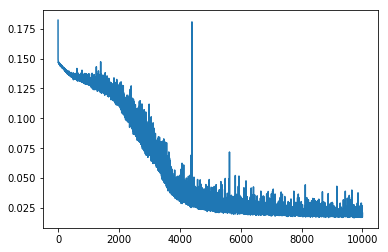

In [278]:
plt.plot(history.history['loss'])

In [ ]:
def prec_gt(y_pred):
    y_pr= []
    for idx in range(len(y_pred)): 
        if y_pred > 0.5:
            y_pr.append(0.1)
        else:
            y_pr.append(0.9)
    return y_pr

y_pr = prec_gt(y_pred)

counter_pos = 0
counter_sum = 0
for idx in range(len(y_pr)):
    counter_sum += 1
    if y_pr[idx] == ver_y[idx]:
        counter_pos += 1

In [259]:
x_set = np.array([0.2,0.2])
x_set1 = np.reshape(x_set, (1, 2))
MLP.predict(x_set1)

array([[ 0.49056154]], dtype=float32)

In [252]:
y_pred = MLP.predict(x_set_v)
def prec_gt(y_pred):
    y_pr= []
    for idx in range(len(y_pred)): 
        if y_pred[idx][0] > y_pred[idx][1]:
            y_pr.append(0.1)
        else:
            y_pr.append(0.9)
    return y_pr

y_pr = prec_gt(y_pred)

counter_pos = 0
counter_sum = 0
for idx in range(len(y_pr)):
    counter_sum += 1
    if y_pr[idx] == ver_y[idx]:
        counter_pos += 1

IndexError: index 1 is out of bounds for axis 0 with size 1

In [35]:
print(counter_pos,counter_sum)

152 152


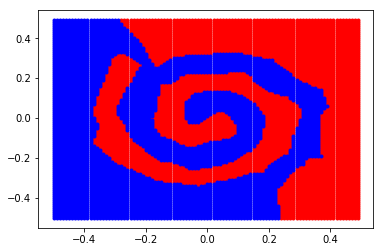

In [276]:
r_list_x = []
r_list_y = []
b_list_x = []
b_list_y = []

for idx_x in range(100):
    for idx_y in range(100):
        x = idx_x*0.01-0.5
        y = idx_y*0.01-0.5
        p = np.array([x,y])
        p1 = np.reshape(p, (1, 2))
        p1_pred = MLP.predict(p1)
        
        if p1_pred > 0.5:
            r_list_x.append(x)
            r_list_y.append(y)
        else:
            b_list_x.append(x)
            b_list_y.append(y)

plt.plot(r_list_x,r_list_y, 'r.')
plt.plot(b_list_x,b_list_y, 'b.')

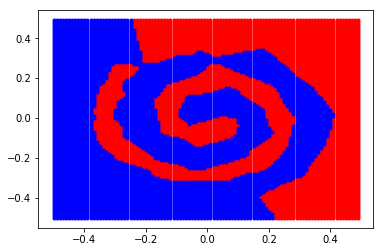

In [51]:
r_list_x = []
r_list_y = []
b_list_x = []
b_list_y = []

for idx_x in range(100):
    for idx_y in range(100):
        x = idx_x*0.01-0.5
        y = idx_y*0.01-0.5
        p = np.array([x,y])
        p1 = np.reshape(p, (1, 2))
        p1_pred = MLP.predict(p1)
        
        if p1_pred[0][0] > p1_pred[0][1]:
            r_list_x.append(x)
            r_list_y.append(y)
        else:
            b_list_x.append(x)
            b_list_y.append(y)

plt.plot(r_list_x,r_list_y, 'r.')
plt.plot(b_list_x,b_list_y, 'b.')